# Project Requirements

## Project Definition

- [x] Student provides a high-level overview of the project. Background information such as the problem domain, the project origin, and related data sets or input data is provided.
- [x] The problem which needs to be solved is clearly defined. A strategy for solving the problem, including discussion of the expected solution, has been made.
- [x] Metrics used to measure performance of a model or result are clearly defined. Metrics are justified based on the characteristics of the problem.

## Analysis

- [x] Features and calculated statistics relevant to the problem have been reported and discussed related to the dataset, and a thorough description of the input space or input data has been made. Abnormalities or characteristics about the data or input that need to be addressed have been identified.
- [x] Build data visualizations to further convey the information associated with your data exploration journey. Ensure that visualizations are appropriate for the data values you are plotting.

## Methodology

- [x] All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified.
- [x] The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.
- [x] The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.

## Results

- [x] If a model is used, the following should hold: The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.
- [x] Alternatively a student may choose to answer questions with data visualizations or other means that don't involve machine learning if a different approach best helps them address their question(s) of interest.
- [x] The final results are discussed in detail. Exploration as to why some techniques worked better than others, or how improvements were made are documented.

## Conclusion

- [x] Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.
- [x] Discussion is made as to how at least one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.

## Deliverables

- [x] If the student chooses to provide a blog post the following must hold: Project report follows a well-organized structure and would be readily understood by a technical audience. Each section is written in a clear, concise and specific manner. Few grammatical and spelling mistakes are present. All resources used to complete the project are cited and referenced.
- [x] If the student chooses to submit a web-application, the following holds: There is a web application that utilizes data to inform how the web application works. The application does not need to be hosted, but directions for how to run the application on a local machine should be documented.
- [x] Student must have a Github repository of their project. The repository must have a README.md file that communicates the libraries used, the motivation for the project, the files in the repository with a small description of each, a summary of the results of the analysis, and necessary acknowledgements. If the student submits a web app rather than a blog post, then the Project Definition, Analysis, and Conclusion should be included in the README file, or in their Jupyter Notebook. Students should not use another student's code to complete the project, but they may use other references on the web including StackOverflow and Kaggle to complete the project.
- [x] Code is formatted neatly with comments and uses DRY principles. A README file is provided that provides. PEP8 is used as a guideline for best coding practices.
- [x] Best practices from software engineering and communication lessons are used to create a phenomenal end product that students can be proud to showcase!

In [1]:
#!pip install --upgrade seaborn
!pip install seaborn==0.11.1
#!pip freeze

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210705131044-0002
KERNEL_ID = 00ddacf4-cde9-4679-aa41-556fcc7db594
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached pandas-1.3.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (10.8 MB)
  Using cached matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Using cached numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached scipy-1.7.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl (1.1 MB)
  Using cached Pillow-8.3.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached six-1.16.0-

In [2]:
# import libraries
import time
start = time.process_time()
import seaborn as sns
import scipy

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf
from pyspark.sql import Window
from pyspark.sql.functions import desc
from pyspark.sql import functions as F
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.functions import max as Fmax
from pyspark.sql.functions import min as Fmin
from pyspark.sql.functions import count as Fcount
from sklearn.metrics import classification_report, confusion_matrix
from pyspark.ml.feature import ChiSqSelector

import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, isnull, when, count, col, avg, col, concat, desc, explode, lit, split, udf, countDistinct
from pyspark.sql.types import IntegerType

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import CountVectorizer, IDF, Normalizer, PCA, RegexTokenizer, StandardScaler, StopWordsRemover, StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier

import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

evaluator = BinaryClassificationEvaluator()

#import warnings
#warnings.filterwarnings('ignore')

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:47: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [3]:
import ibmos2spark, os
# @hidden_cell

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_962aee2aed2640fd9bd88205153adee2 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_962aee2aed2640fd9bd88205153adee2 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

credentials = {
    'endpoint': endpoint_962aee2aed2640fd9bd88205153adee2,
    'service_id': 'iam-ServiceId-2199f5d1-f295-47ce-a642-dbd9e3ef6b7b',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': 'TQ6G024DgHSXKklTAO5ARM25DCqOiElHKupv49LOiG22'
}

configuration_name = 'os_962aee2aed2640fd9bd88205153adee2_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Function Definitions

In [4]:
def check_distribution(var):
    '''
    INPUT:
    var - feature column
    
    Description:
    Plot and Test feature distribution
    '''    
    ################### try linear
    
    plt.figure(figsize = [10, 5]) # larger figure size for subplots
    plt.subplot(1, 2, 1)
    # create a histogram of the data
    bin_size = (np.max(df[var])-np.min(df[var]))/10
    bin_edges = np.arange(np.min(df[var]), np.max(df[var]) + bin_size, bin_size)
    plt.hist(df[var], bins = bin_edges);

    # overlay a theoretical normal distribution on top
    samp_mean = df[var].mean()
    samp_sd = df[var].std()
    
    # calculate the normal distribution and plot it
    x = np.linspace(np.min(df[var]), np.max(df[var]), 1000)
    y = scipy.stats.norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
    y *= df.shape[0] * bin_size # scale the distribution height
    plt.title('Histogram'.format(var))
    plt.xlabel(var)
    plt.plot(x, y);
    
    # create a  probability plot   
    plt.subplot(1, 2, 2)
    plt.title('Probability Plot')
    n_points = df.shape[0]
    qs = (np.arange(n_points) - .5) / n_points
    expected_vals = scipy.stats.norm.ppf(qs, samp_mean, samp_sd)

    plt.scatter(expected_vals, df[var].sort_values())
    plt.plot([np.min(df[var]),np.max(df[var])],[np.min(df[var]),np.max(df[var])],'--', color = 'black')
    plt.axis('equal')
    plt.xlabel('Expected Values')
    plt.ylabel('Observed Values');
    
    # check skewness
    if round(np.mean(df[var])) > np.nanmedian(df[var]):
        print('mean: {}, median: {} --> right-skewed'.format(round(np.mean(df[var]), 3), np.nanmedian(df[var])))
        
    else:
        print('mean: {}, median: {} --> left-skewed'.format(round(np.mean(df[var]), 3), np.nanmedian(df[var])))
    
    # make inferential statement:
    statistic, pvalue = scipy.stats.normaltest(df[var], nan_policy = 'omit')
    alpha = 0.05        
        
    if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
        print('hypothesis test result: {} < {} the distribution does not come from a normal distribution'.format(pvalue, alpha))
        #print("null hypothesis: x comes from a normal distribution: The null hypothesis can be rejected")
    else:
        print('hypothesis test result: {} > {} the distribution does come from a normal distribution'.format(pvalue, alpha))
        #print("null hypothesis: x comes from a normal distribution: The null hypothesis cannot be rejected")
        
    if 0:
        ################### try log-scale    
        # create a histogram of the data
        plt.figure(figsize = [10, 5]) # larger figure size for subplots    
        log_bin_size = (np.max(df[var])-np.min(df[var]))/10 #0.1
        bin_edges = 10 ** np.arange(np.min(df[var]), np.log10(df[var].max())+log_bin_size, log_bin_size)
        #bin_edges = np.arange(np.min(df[var]), np.max(df[var]) + bin_size, bin_size)
        plt.hist(df[var], bins = bin_edges);
        plt.xscale('log')
        plt.xlabel(var + ' - logarithmic')
    
    # make inferential statement:
    # credit: https://stackoverflow.com/questions/36795949/python-testing-if-my-data-follows-a-lognormal-distribution
    statistic, pvalue = scipy.stats.kstest(df[var].dropna(), "lognorm", scipy.stats.lognorm.fit(df[var].dropna()), alternative = 'less')
    alpha = 0.05
    if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
        print('hypothesis test result: {} < {} the distribution does not come from a log-normal distribution'.format(pvalue, alpha))
        #print("null hypothesis: x comes from a log-normal distribution: The null hypothesis can be rejected")
    else:
        print('hypothesis test result: {} > {} the distribution does come from a log-normal distribution'.format(pvalue, alpha))
        #print("null hypothesis: x comes from a log-normal distribution: The null hypothesis cannot be rejected")

def plot_feature_importance(classifier):
    '''
    INPUT:
    var - classifier type --> write "regression" or "other"
    
    Description:
    Plots the feature Importance / Regression Coefficients
    '''        
    numeric_features_dict=df_scaled.schema["vectorized_features"].metadata['ml_attr']['attrs']['numeric']
    binary_features_dict=df_scaled.schema["vectorized_features"].metadata['ml_attr']['attrs']['binary']
    pandasDF = pd.DataFrame(df_scaled.schema["vectorized_features"].metadata["ml_attr"]["attrs"]["binary"]+df_scaled.schema["vectorized_features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")  
    plt.figure(figsize=[10,50])
    if classifier == 'regression':
        pandasDF['coeff']=lrModel.coefficients#stages[-1].coefficients
        pandasDF=pandasDF.sort_values(by='coeff')
        sns.barplot(y='name', x='coeff', data=pandasDF, color = sns.color_palette()[0]);    
    else:
        importances = rfModel.featureImportances
        importances_list = [importances[i] for i in range(len(importances))]
        pandasDF['FIT']=importances_list
        pandasDF=pandasDF.sort_values(by='FIT')
        sns.barplot(y='name', x='FIT', data=pandasDF, color = sns.color_palette()[0]);
        
def evaluate_model(predictions):
    '''
    INPUT:
    predictions df
    
    Description:
    Evaluates your ML-Models-Performance based on Metrics and Confusion Matrices
    '''            
    print('Running "evaluate_model" --> -.- I am devastated -.- --> Converting to Pandas DataFrame .......')
    dummy_df=predictions.select(['label', 'prediction']).toPandas()
    y_true = dummy_df.label
    y_pred = dummy_df.prediction
    accuracy = lrModel.summary.accuracy
    #accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(predictions.count())
    print('------- Metrics ---------')
    print(classification_report(y_true, y_pred))
    #print('Test Area Under ROC', evaluator.evaluate(predictions))
    print("Accuracy: ", accuracy)
    print('------- Confusion Matrix ---------')    
    print(confusion_matrix(y_true, y_pred))
    print('Total number of estimations:', len(y_true))
    print('False Negative: Prediction says Churn, but it actually is not Churn', confusion_matrix(y_true, y_pred)[0][1])
    print('False Positive: Prediction says no Churn, but it actually is Churn', confusion_matrix(y_true, y_pred)[1][0])
    print('True Positive: Prediction says Churn, and it actually is Churn', confusion_matrix(y_true, y_pred)[1][1])
    print('True Negative: Prediction says no Churn, and it actually is no Churn', confusion_matrix(y_true, y_pred)[0][0])    

    
def udf_season(month):
    '''
    INPUT:
    month - as int
    
    Description:
    Outputs the season for given month
    '''         
    if (month <= 5) & (month >= 3):
        return 'Spring'
    elif (month >= 6) & (month <= 8):
        return 'Summer'    
    elif (month == 12) | (month == 1) | (month == 2):
        return 'Winter'        
    elif (month >= 9) & (month <= 11):
        return 'Autumn'
    
def calc_statistical_relevance_num(var, alpha):
    '''
    INPUT:
    var - feature column name
    alpha - define alpha (probability of error)
    
    Description:
    tests the statistical relevance and correlation
    '''
    print(var)
    correlation, pvalue = scipy.stats.pearsonr(x = df[var], y = df['Phase_cancel'])
    if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
        print('hypothesis test result: {} < {} \nwe are {}% confident, that the correlation is statistical relevant'.format(round(pvalue, 3), alpha, 100-100*alpha))    
        if correlation <= 0.3:
            print('the correlation is equal to {}, which implies a weak relationship'.format(round(correlation, 3)))
        elif correlation > 0.3 and correlation <= 0.7:
            print('the correlation is equal to {}, which implies a moderate relationship'.format(round(correlation, 3)))
        else:
            print('the correlation is equal to {}, which implies a strong relationship'.format(round(correlation, 3)))        
    else:  # null hypothesis: x comes from a normal distribution
        print('hypothesis test result: {} > {} \nwe are {}% confident, that the correlation is not statistical relevant'.format(round(pvalue, 3), alpha, 100-100*alpha))    
    print('--------------------------------------------------------------')        

def calc_statistical_relevance_cat(df, var, order, heigth=5):
    '''
    INPUT:
    var - feature column name
    alpha - define alpha (probability of error)
    order - give the order of the categorial variable if possible (only if category is ordinal), otherwise give any order, does not matter
    height - figure
    
    Description:
    tests the statistical relevance and correlation
    '''
    ############## bootstrap approach
        #build confident intervalls to double check, since hypothesis testing isn't very intuitive:
        #pro tip by udacity: The bootstrap approach with confidence intervals can be used in place of any other hypoethis test        
    grad_means_per_level = {}
    print('Calculate confidential intervals for the Phase_cancel rate for each level')    
    for level in df[var].unique():
        grade_means = []
        for _ in range(100):
            #bootstrap
            bootstrap=df.loc[df[var]==level, 'Phase_cancel'].sample(10000, replace=True)
            #calculate sample medians
            grade_mean=bootstrap.mean()
            #append to list
            grade_means.append(grade_mean)                
        #make np.arrays
        grade_means=np.array(grade_means)
        grad_means_per_level[level]=grade_means

    alpha=0.05
    xerrs=[]
    xwidths=[]
    for level in order:
        print('{}: {} {}'.format(level, (round((np.percentile(grad_means_per_level[level], alpha)), 2)), round((np.percentile(grad_means_per_level[level], 100-alpha)), 2)))
        err=((np.percentile(grad_means_per_level[level], alpha))-(np.percentile(grad_means_per_level[level], 100-alpha)))/2
        xerrs.append(err)
        width=((np.percentile(grad_means_per_level[level], alpha))+(np.percentile(grad_means_per_level[level], 100-alpha)))/2
        xwidths.append(width)        
    plt.figure(figsize=[10,heigth])
    plt.barh(width=xwidths, y=order, xerr=xerrs);
    plt.xlabel('mean phase_cancel')

In [5]:
show=False #Decide, wheter it makes sense, to show outputs of pyspark df's. will be slow, but good to unterstand certain steps
optimize=False #optimize grid-cv-search? will be slow, but maybe better model performance
model_eval=True #Choose whether you like to see model evaluations.
plot=True #Choose if you want to see any EDA-Visualizations

In [6]:
# create a Spark session
spark = SparkSession \
    .builder \
    .appName("Sparkify - The Capstone Project") \
    .getOrCreate()

In [7]:
spark

In [8]:
user_log_medium = spark.read.json(cos.url('medium-sparkify-event-data.json', 'pysparkmludacity-donotdelete-pr-mcexy2brhqo5ly'))
user_log_mini = spark.read.json(cos.url('mini_sparkify_event_data.json', 'pysparkmludacity-donotdelete-pr-mcexy2brhqo5ly'))
user_log = user_log_mini

In [9]:
if show:
    user_log.printSchema()
    user_log.toPandas().head()
    
#### Get familiar with the columns - Summary Statistics

    user_log.select(user_log.columns[:5]).describe().show()
    user_log.select(user_log.columns[5:10]).describe().show()
    user_log.select(user_log.columns[10:15]).describe().show()
    user_log.select(user_log.columns[15:]).describe().show()

#### Get familiar with the columns - Distinct Values

    for i in range(len(user_log.columns)):
        print(user_log.select(user_log.columns[i]).distinct().show())

# #### Get familiar with the columns - Row by Row

    user_log.select(user_log.columns[:5]).distinct().show()
    user_log.count(), len(user_log.columns)
    user_log.select(user_log.columns[10:15]).show()
    user_log.select(user_log.columns[15:]).show()

 Column | Relevant? | Cleaning? | Feature Engineering possible? | explanation
 --- | --- | --- | --- | ---
 artist | no | - | - | song artist
 auth | no | - | - | authentication level, 4 categories (Logged In, Logged Out, Cancelled, Guest)
 firstName | no | - | - | user first name
 lastName | no | - | - | user last name
 itemInSession | no | - | - | log count in the session
 length | no | - | - | song length
 method | no | - | - | HTTP request method, 2 categories (GET and PUT)
 registration | no | - | - | user’s registration timestamp
 sessionId | no | - | - | session Id
 song | no | - | - | song name
 status | no | - | - | HTTP status code, 3 categories (200, 307 and 404)
 level | no | - | - | subscription level, 2 categories (free and paid)

 Column | Relevant? | Cleaning? | Feature Engineering possible? | explanation
 --- | --- | --- | --- | ---
 ts | yes | unix to relevant columns | hour of day, month, day of month, year | unix timestamp
 userAgent | yes | one-hot-encoding | - | browser used by the user
 userId | yes | assuming: the higher the newer? | - | user Id 
 gender | yes | null-values --> diverse?!, one-hot-encoding | - | gender
 location | yes | one-hot-encoding | - | user location
 page | yes | - | several features and the label churn/phase (before, or after cancelling) | type of interaction associated with the page (NextSong, Home, Login, Cancellation Confirmation, etc.)

 <a id='Clean'></a>
## 1.3 Clean & Feature Engineering

 - [x] All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified.

### a) Clean (Data Preperation)

In [10]:
#### Rows with Missing Values
user_log_valid = user_log

if show:
    df_nulls=user_log_valid.select([count(when(isnull(c), c)).alias(c) for c in user_log_valid.columns]).toPandas()
    for col in df_nulls.columns.values:
        print(col, df_nulls[col].values[0])

# We should handle the 8346, since we want to use location. Let's get rid of those rows completely. Deriving these emptry cells is not necessary, since we have enough rows anyways. The 58392 empty cells are not relevant at all, since we won't be using these columns as features anyways.

user_log_valid = user_log_valid.na.drop(subset=["userId", "firstName", "registration", "location", "gender"])

if show:
    df_nulls=user_log_valid.select([count(when(isnull(c), c)).alias(c) for c in user_log_valid.columns]).toPandas()
    for col in df_nulls.columns.values:
        print(col, df_nulls[col].values[0])

# All good now.

#### Rows with NaN Values

if show:
    user_log_valid.select([count(when(isnan(c), c)).alias(c) for c in user_log_valid.columns]).toPandas().head()

# All good here

#### Rows with empty strings

if show:
    test=user_log_valid.toPandas()
    for c in test.columns:
        try:
            print(c, (test[c]=='').sum())
        except:
            42

# All good here

#### Duplicate Rows

if show:
    before=user_log_valid.count()
    after=user_log_valid.dropDuplicates().count()
    print(before, after)

# All good here

#### Data Types

user_log_valid = user_log.withColumn("userId", F.col("userId").cast(IntegerType()))
if show:
    user_log_valid.select("userId").printSchema()

 ### b) Feature Engineering
 Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
 - Write a script to extract the necessary features from the smaller subset of data
 - Ensure that your script is scalable, using the best practices discussed in Lesson 3
 - Try your script on the full data set, debugging your script if necessary
 
 If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.


In [11]:
### Categorial Features

# I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

#### Users Downgrade Their Accounts

# Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.
if show:
    user_log_valid.filter("page = 'Submit Downgrade'").show()

flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)
user_log_valid = user_log_valid.withColumn("phase_down", Fsum("downgraded").over(windowval))

if show:
    user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase_down"]).where(user_log.userId == "47").sort("ts").collect()

# #### Users upgrading their accounts
# 
# Find when users upgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post upgrade events.

if show:
    user_log_valid.filter("page = 'Upgrade'").show()

flag_downgrade_event = udf(lambda x: 1 if x == "Upgrade" else 0, IntegerType())
user_log_valid = user_log_valid.withColumn("upgraded", flag_downgrade_event("page"))
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)
user_log_valid = user_log_valid.withColumn("phase_up", Fsum("upgraded").over(windowval))

if show:
    user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase_up"]).where(user_log.userId == "148").sort("ts").collect()

# #### Users Cancel Their Accounts
# 
# Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

if show:
    user_log_valid.select('userId').filter("page = 'Cancellation Confirmation'").show()

flag_downgrade_event = udf(lambda x: 1 if x == "Cancellation Confirmation" else 0, IntegerType())
user_log_valid = user_log_valid.withColumn("cancelled", flag_downgrade_event("page"))
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)
user_log_valid = user_log_valid.withColumn("phase_cancel", Fsum("cancelled").over(windowval))

if show:
    user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase_cancel"]).where(user_log.userId == "47").sort("ts").collect()

user_log_valid = user_log_valid.withColumn("phase_cancel", F.col("phase_cancel").cast(IntegerType()))
user_log_valid = user_log_valid.withColumn("phase_down", F.col("phase_down").cast(IntegerType()))
user_log_valid = user_log_valid.withColumn("phase_up", F.col("phase_up").cast(IntegerType()))

### Numeric Features

##### time based

get_year = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).year, IntegerType())
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour, IntegerType())
get_day = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).day, IntegerType())
get_month = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).month, IntegerType())

user_log_valid = user_log_valid.withColumn("year", get_year(user_log_valid.ts))
user_log_valid = user_log_valid.withColumn("hour", get_hour(user_log_valid.ts))
user_log_valid = user_log_valid.withColumn("month", get_month(user_log_valid.ts))
user_log_valid = user_log_valid.withColumn("day", get_day(user_log_valid.ts))

if show:
    user_log_valid.select("day", "hour", "year", "month").distinct().show()

udfSeason = udf(udf_season)

user_log_valid = user_log_valid.withColumn("Season", udfSeason('month'))

if show:
    user_log_valid.select("month").distinct().show()
    user_log_valid.select("Season").distinct().show()

**Target Format for ML-Input-DataFrame:**
 
groupby UserId | Phase_cancel | Season | HourOfDay | DayOfMonth | Gender | Location
 
UserId | PhaseCancel | Season | HourOfDay | DayOfMonth | Gender | Location | TimePerSession_AVG | SessionCount | TotalInteractionsPerSession_AVG | PageXInteractionsPerSession_AVG | PageYInteractionsPerSession_AVG | PageZInteractionsPerSession_AVG
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---| ---

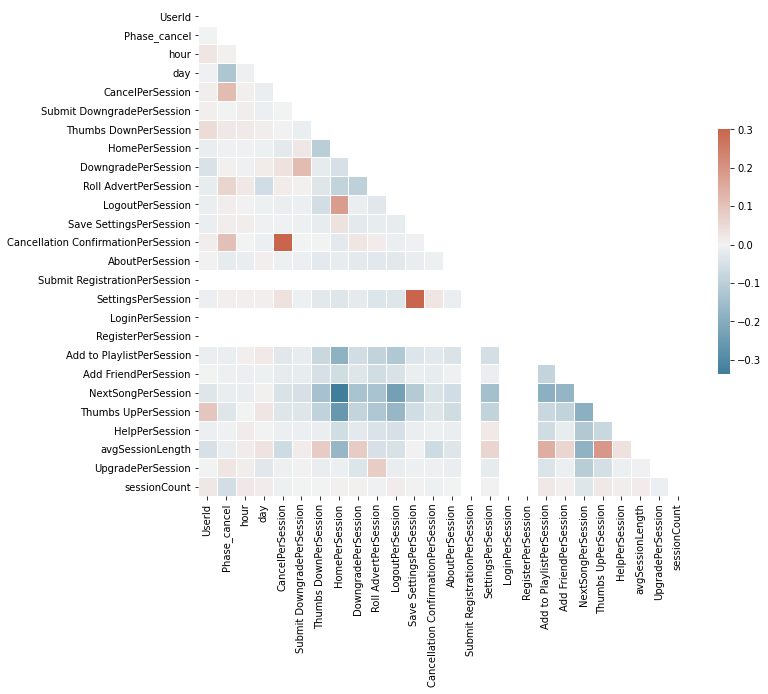

In [12]:
if show:
    user_log_valid.show()
windowval = Window.partitionBy("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId", "page").orderBy(desc("ts"))

#drop irrelevant columns
user_log_valid = user_log_valid.withColumn("pageCount", Fcount("page").over(windowval))
if show:
    user_log_valid.select("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId", "page", "pageCount").show()

#Only keep relevant columns
user_log_valid=user_log_valid.select("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId", "ts", "page", "pageCount")

# Calculate Page Statistics
#Perform group by to get target format
user_log_valid_pages=user_log_valid.groupby("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId", "page").pivot("page")     .agg(Fmin("pageCount")).drop('page').na.fill(0)
if show:
    user_log_valid_pages.show()
    
# Calculate Session Statistics
#Perform group by to get target format
user_log_valid_session_length=user_log_valid.groupby("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId")     .agg(
    Fmin("ts").alias("sessionStart"), \
    Fmax("ts").alias("sessionEnd")).na.fill(0)
if show:
    user_log_valid_session_length.show()

user_log_valid_session_length=user_log_valid_session_length.withColumn("sessionLength", F.col("sessionEnd")-F.col("sessionStart")).drop("sessionEnd", "sessionStart")

# Join Session and Page Statistics
user_log_valid_agg = user_log_valid_pages.join(user_log_valid_session_length.select("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId", "sessionLength"), on = ["UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location", "SessionId"])
if show:
    user_log_valid_agg.show()

# Calc Page Statistics per Session, Session Count, Average Session Length
user_log_valid_final=user_log_valid_agg.groupBy("UserId", "Phase_cancel", "Season", "hour", "day", "Gender", "Location").agg(avg("Cancel").alias("CancelPerSession"), avg("Submit Downgrade").alias("Submit DowngradePerSession"),          avg("Thumbs Down").alias("Thumbs DownPerSession"),          avg("Home").alias("HomePerSession"),          avg("Downgrade").alias("DowngradePerSession"),          avg("Roll Advert").alias("Roll AdvertPerSession"),          avg("Logout").alias("LogoutPerSession"),          avg("Save Settings").alias("Save SettingsPerSession"),          avg("Cancellation Confirmation").alias("Cancellation ConfirmationPerSession"),          avg("About").alias("AboutPerSession"),          avg("Submit Registration").alias("Submit RegistrationPerSession"),          avg("Settings").alias("SettingsPerSession"),          avg("Login").alias("LoginPerSession"),          avg("Register").alias("RegisterPerSession"),          avg("Add to Playlist").alias("Add to PlaylistPerSession"),          avg("Add Friend").alias("Add FriendPerSession"),          avg("NextSong").alias("NextSongPerSession"),          avg("Thumbs Up").alias("Thumbs UpPerSession"),          avg("Help").alias("HelpPerSession"),          avg("sessionLength").alias('avgSessionLength'),          avg("Upgrade").alias("UpgradePerSession"),          countDistinct("sessionId").alias("sessionCount"))
if show:
    user_log_valid_final.show()

# Inspect final ML-Input
if plot:
    iLovePandas = user_log_valid_final.toPandas()
    # Compute the correlation matrix
    corr = iLovePandas.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [13]:
if plot:
    iLovePandas.shape
    iLovePandas
    iLovePandas.describe()

 <a id='Analyse Data'></a>
 ## 2. Analyse Data
 <a id='Explore'></a>
 ## 2.1 Explore - Descriptive Statistics (EDA)
 When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.
 
 Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

 tbd:
 - [ ] Features and calculated statistics relevant to the problem have been reported and discussed related to the dataset
 - [ ] Build data visualizations to further convey the information associated with your data exploration journey. Ensure that visualizations are appropriate for the data values you are plotting.


<a id='Draw Conclusions'></a>
## 2.2 Draw Conclusions - Inferential Statistics

- [ ] The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.
- [ ] the final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.
- [ ] The final results are discussed in detail. Exploration as to why some techniques worked better than others, or how improvements were made are documented.

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

---
Credits: https://www.kdnuggets.com/2019/05/churn-prediction-machine-learning.html:

**customer demographic features** that contain basic information about a customer (e.g., age, education level, location, income):
- we have: gender, location, season

**user behavior features** describing how a person uses a service or product (e.g., lifecycle stage, number of times they log in into their accounts, active session length, time of the day when a product is used actively, features or modules used, actions, monetary value)
- we have: 
    - number of times they log into their accounts
    - active session length
    - time of the day when a product is used actively
    - features of modules used
    - actions

**support features** that characterize interactions with customer support (e.g., queries sent, number of interactions, history of customer satisfaction scores)
- we have: none

**contextual features** representing other contextual information about a customer.
- we have: none


------------- 1D Investigation --------------
------------- Plot & Test Feature Distributions --------------
Phase_cancel
mean: 0.166, median: 0.0 --> left-skewed
hypothesis test result: 0.0 < 0.05 the distribution does not come from a normal distribution
hypothesis test result: 0.0 < 0.05 the distribution does not come from a log-normal distribution
----------------------------------------
hour
mean: 12.142, median: 13.0 --> left-skewed
hypothesis test result: 0.0 < 0.05 the distribution does not come from a normal distribution
hypothesis test result: 1.2778722561266788e-123 < 0.05 the distribution does not come from a log-normal distribution
----------------------------------------
day
mean: 15.715, median: 16.0 --> left-skewed
hypothesis test result: 0.0 < 0.05 the distribution does not come from a normal distribution
hypothesis test result: 2.942294766974629e-85 < 0.05 the distribution does not come from a log-normal distribution
----------------------------------------
CancelPerSe

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


hypothesis test result: 0.0017689334416580679 < 0.05 the distribution does not come from a log-normal distribution
----------------------------------------
sessionCount
mean: 1.054, median: 1.0 --> left-skewed
hypothesis test result: 0.0 < 0.05 the distribution does not come from a normal distribution
hypothesis test result: 3.887685592946201e-167 < 0.05 the distribution does not come from a log-normal distribution
----------------------------------------
------------- 2D Investigation --------------
------------- calc & plot the features relevance regarding to the label --------------
hour
hypothesis test result: 0.755 > 0.05 
we are 95.0% confident, that the correlation is not statistical relevant
--------------------------------------------------------------
day
hypothesis test result: 0.0 < 0.05 
we are 95.0% confident, that the correlation is statistical relevant
the correlation is equal to -0.125, which implies a weak relationship
-------------------------------------------------

/home/spark/shared/user-libs/python/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


CancelPerSession
hypothesis test result: 0.0 < 0.05 
we are 95.0% confident, that the correlation is statistical relevant
the correlation is equal to 0.117, which implies a weak relationship
--------------------------------------------------------------
Submit DowngradePerSession
hypothesis test result: 0.887 > 0.05 
we are 95.0% confident, that the correlation is not statistical relevant
--------------------------------------------------------------
Thumbs DownPerSession
hypothesis test result: 0.006 < 0.05 
we are 95.0% confident, that the correlation is statistical relevant
the correlation is equal to 0.021, which implies a weak relationship
--------------------------------------------------------------
HomePerSession
hypothesis test result: 0.607 > 0.05 
we are 95.0% confident, that the correlation is not statistical relevant
--------------------------------------------------------------
DowngradePerSession
hypothesis test result: 0.748 > 0.05 
we are 95.0% confident, that the corr

/home/spark/shared/user-libs/python/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Cancellation ConfirmationPerSession
hypothesis test result: 0.0 < 0.05 
we are 95.0% confident, that the correlation is statistical relevant
the correlation is equal to 0.106, which implies a weak relationship
--------------------------------------------------------------
AboutPerSession
hypothesis test result: 0.014 < 0.05 
we are 95.0% confident, that the correlation is statistical relevant
the correlation is equal to -0.018, which implies a weak relationship
--------------------------------------------------------------
SettingsPerSession
hypothesis test result: 0.53 > 0.05 
we are 95.0% confident, that the correlation is not statistical relevant
--------------------------------------------------------------
Add to PlaylistPerSession
hypothesis test result: 0.087 > 0.05 
we are 95.0% confident, that the correlation is not statistical relevant
--------------------------------------------------------------
Add FriendPerSession
hypothesis test result: 0.403 > 0.05 
we are 95.0% confide

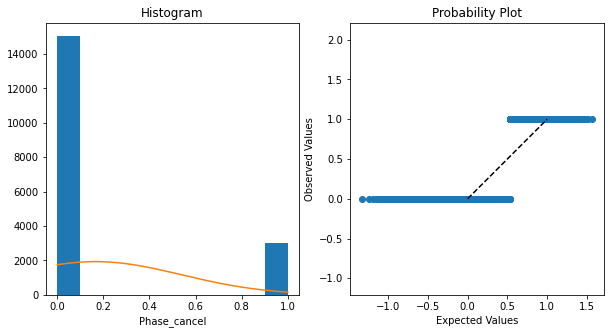

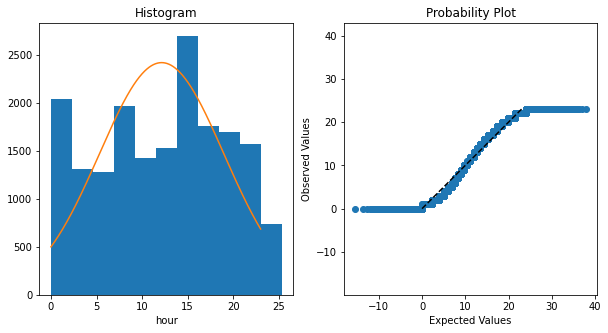

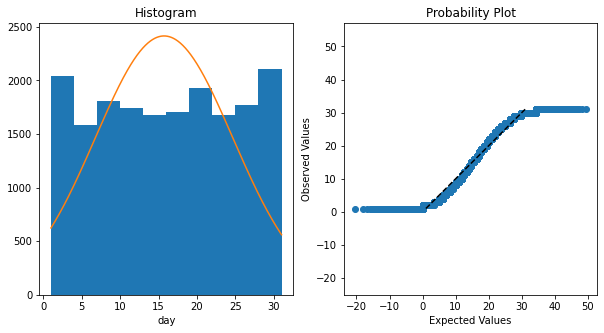

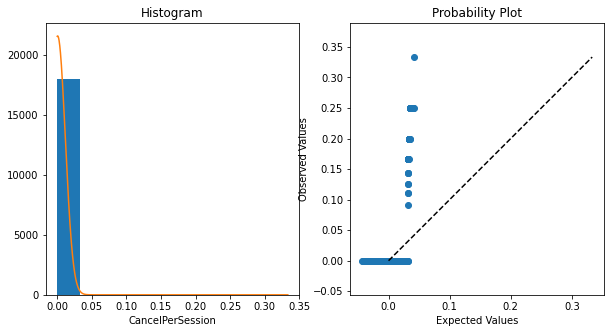

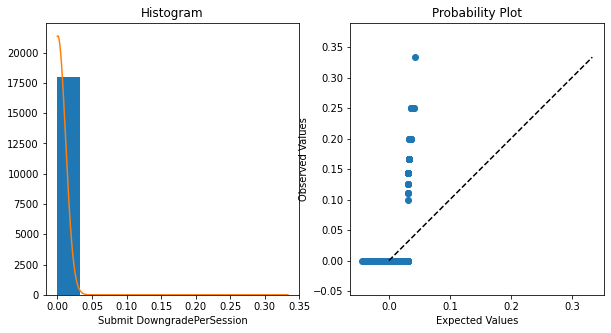

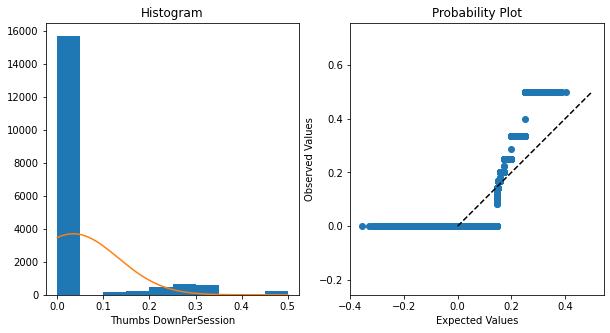

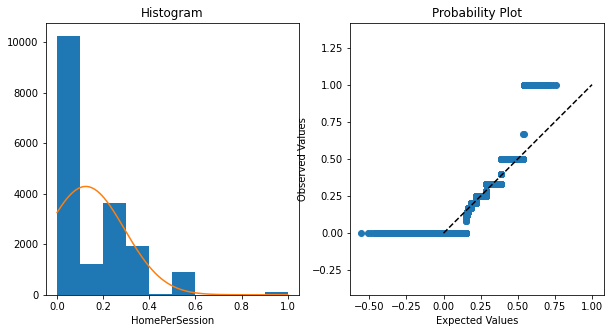

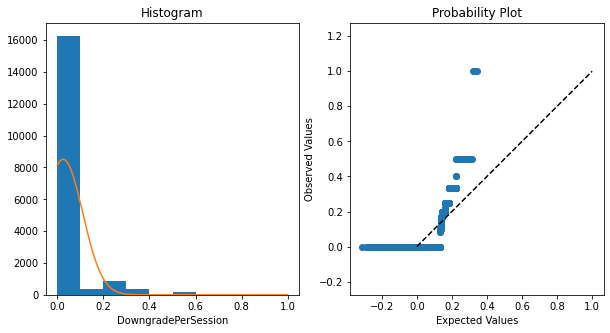

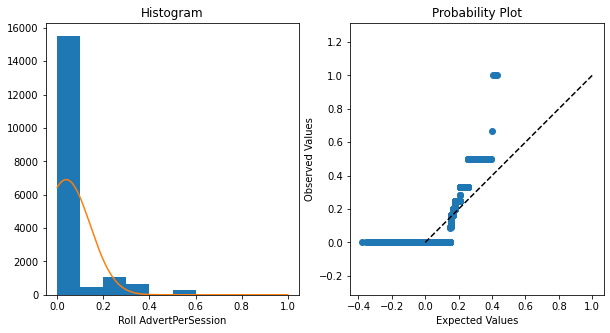

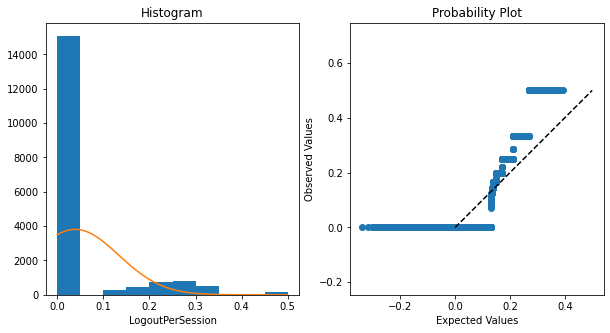

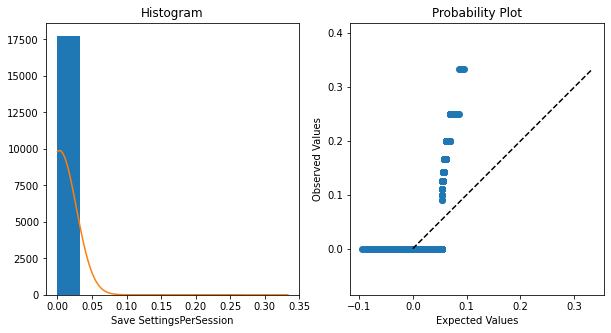

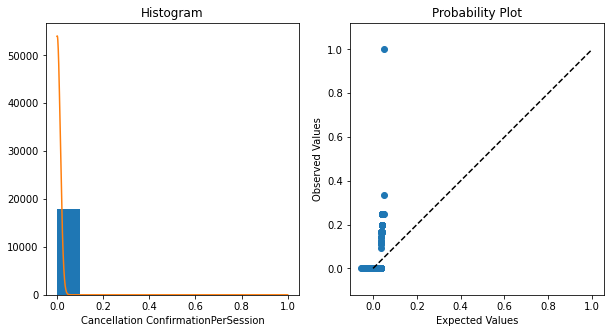

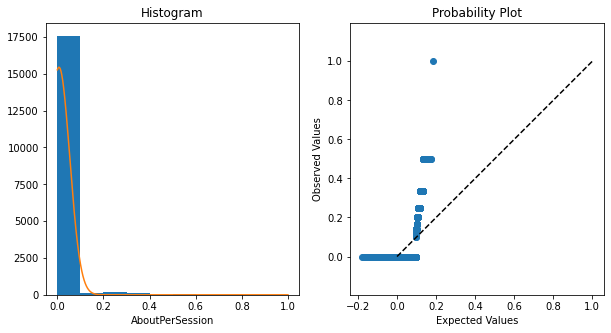

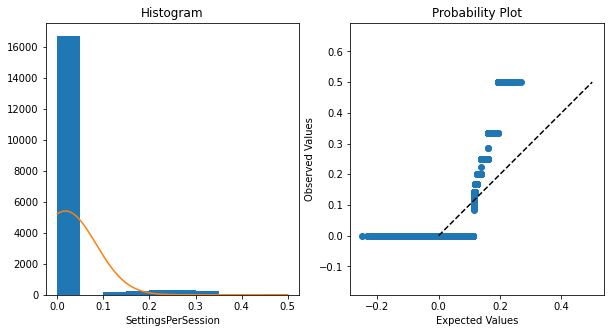

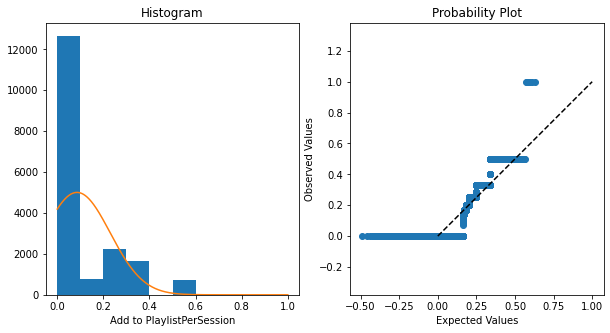

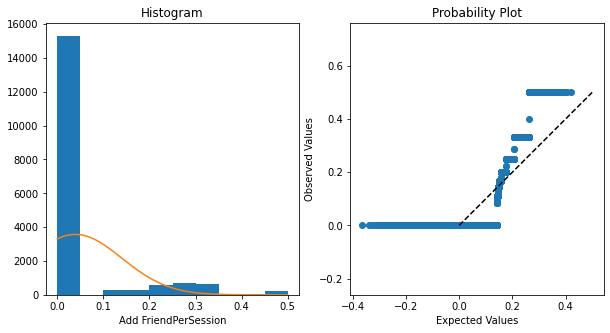

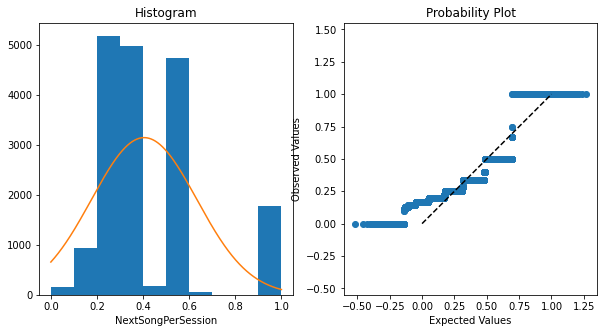

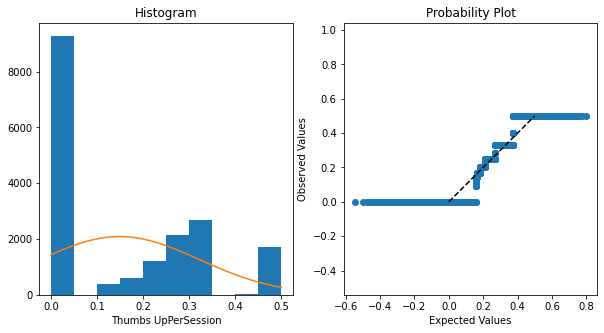

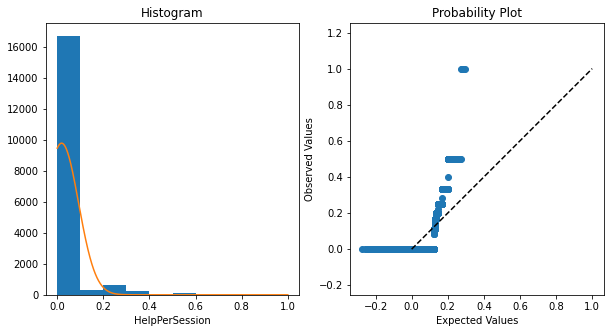

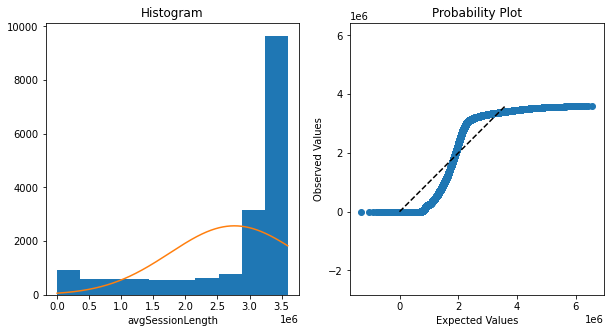

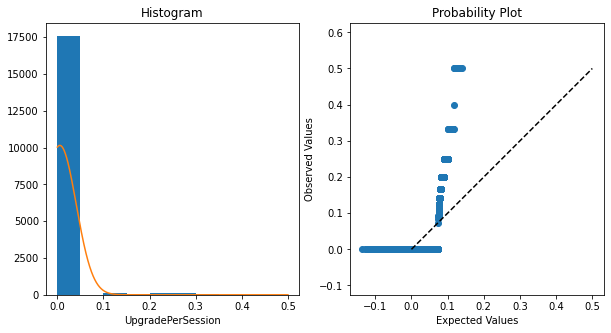

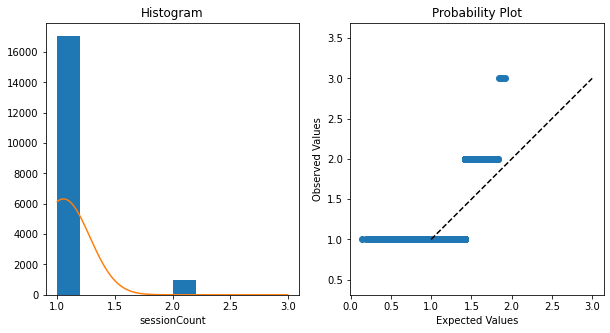

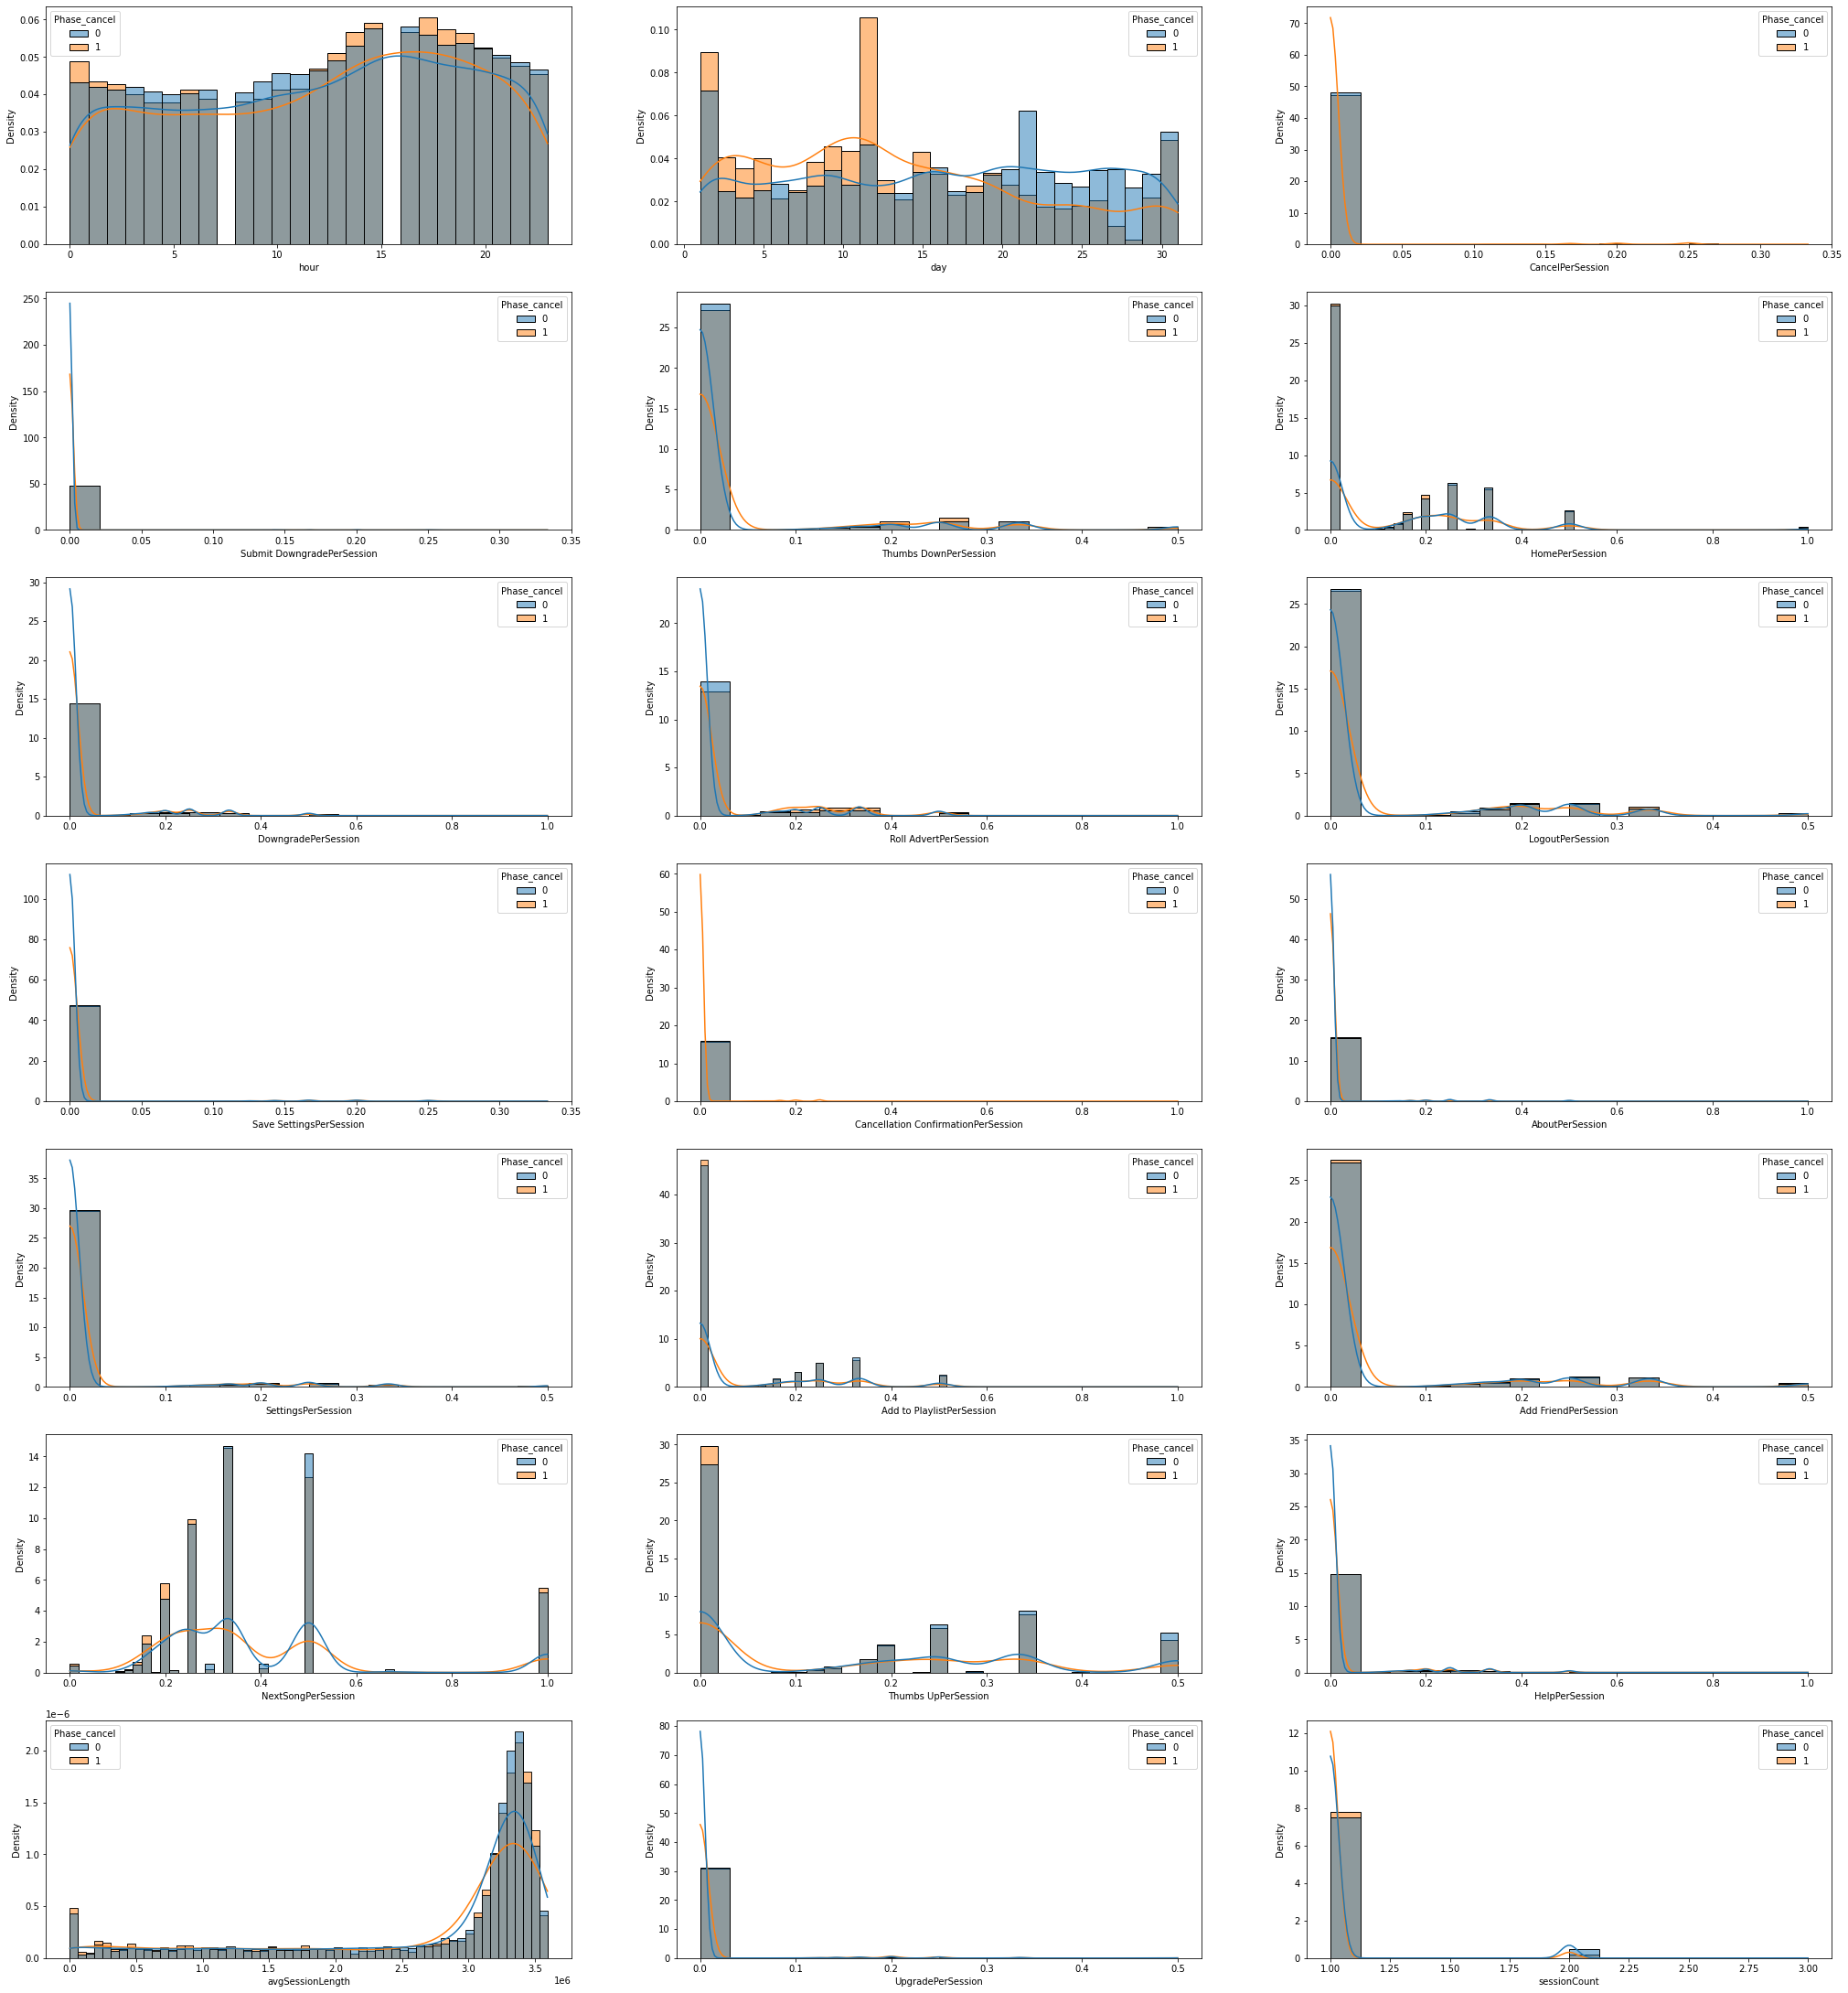

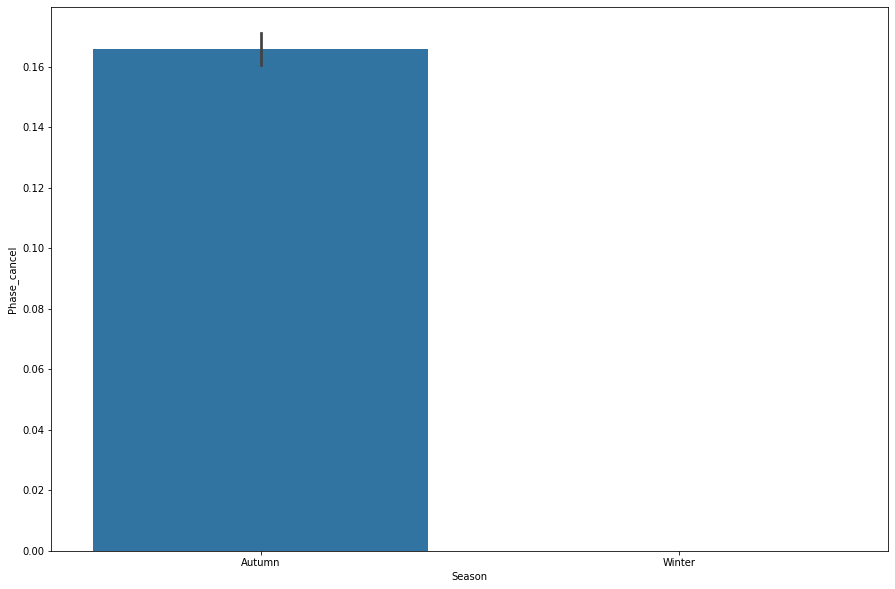

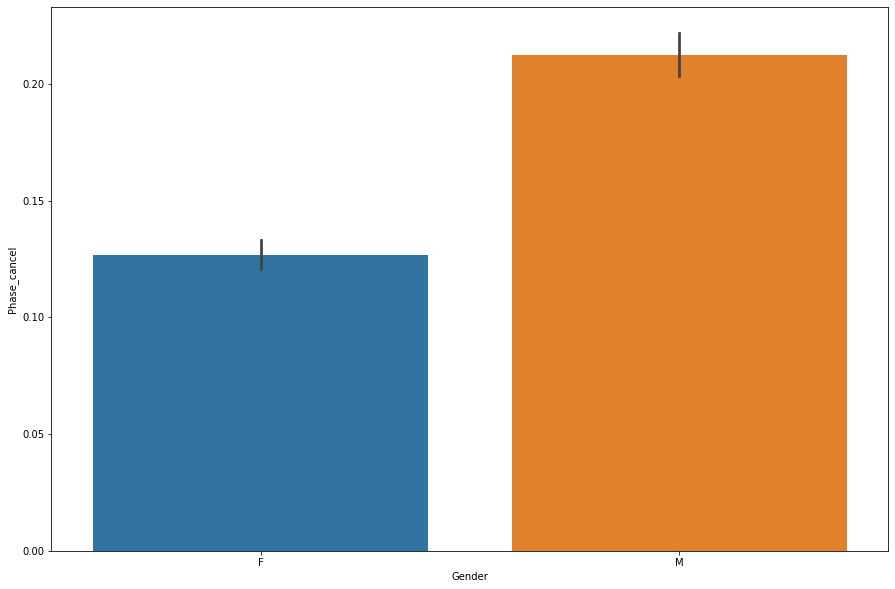

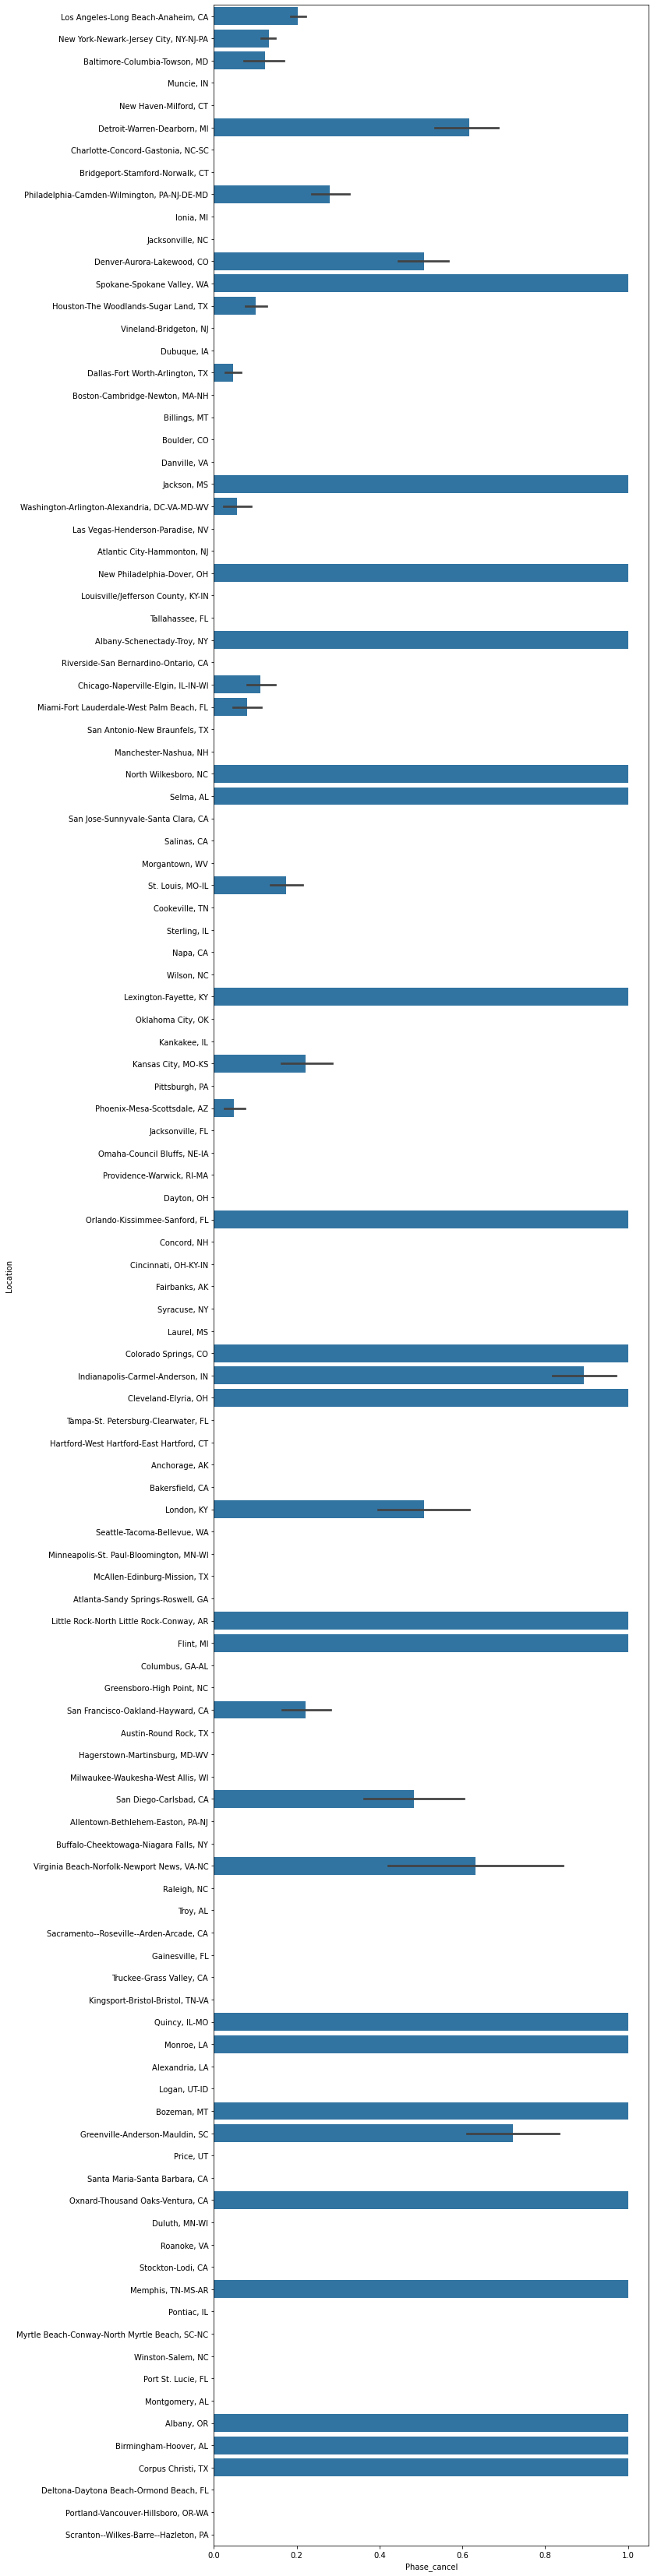

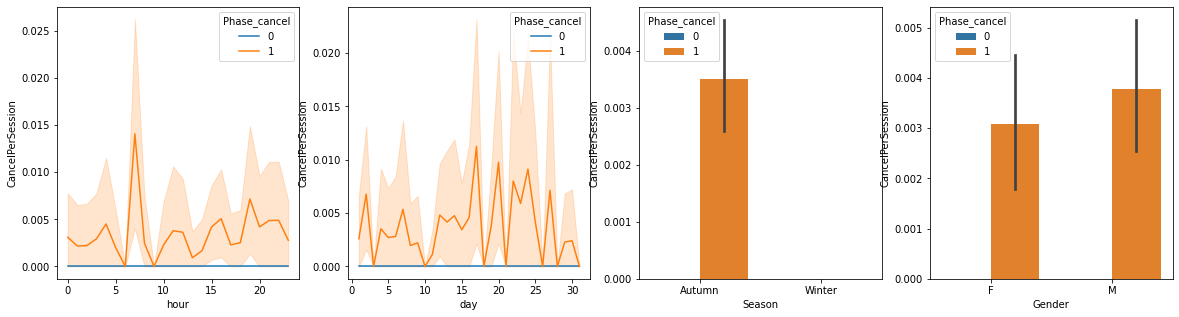

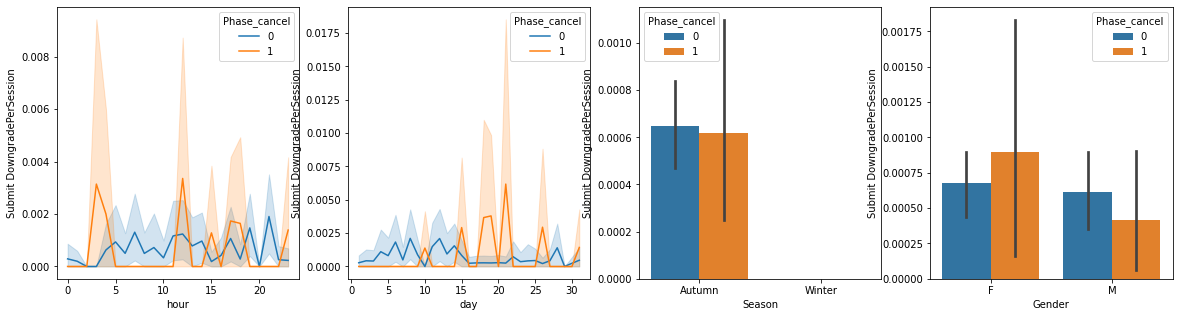

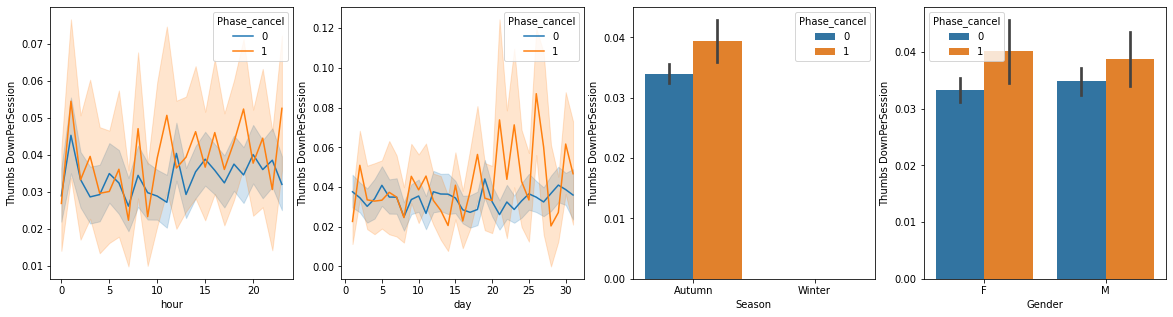

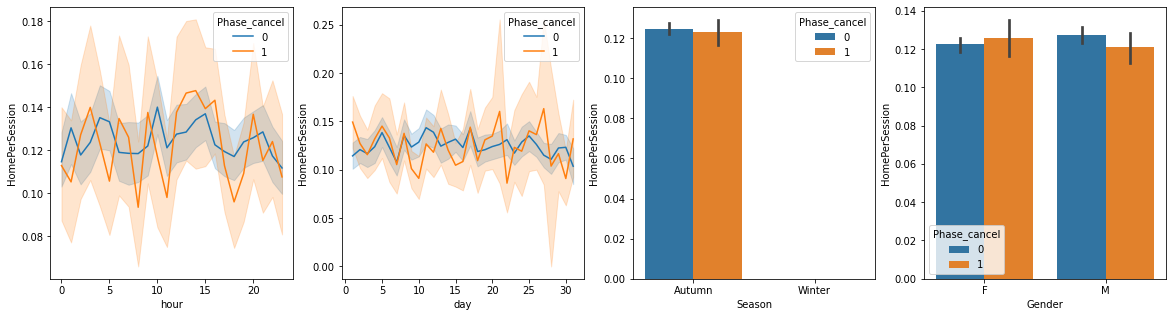

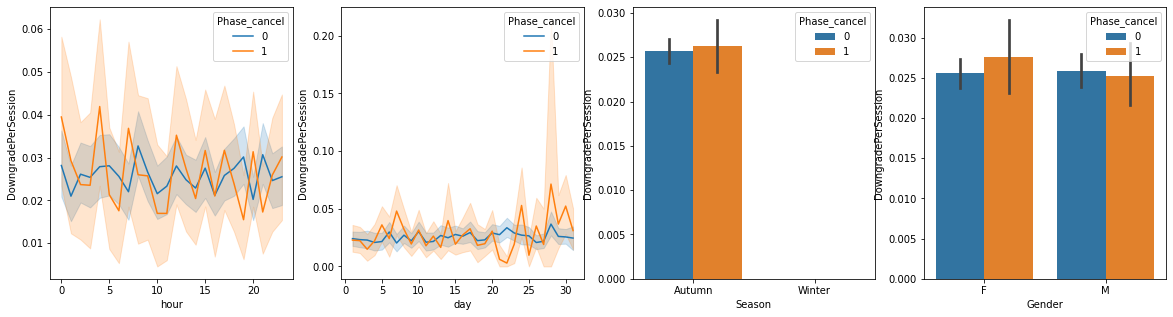

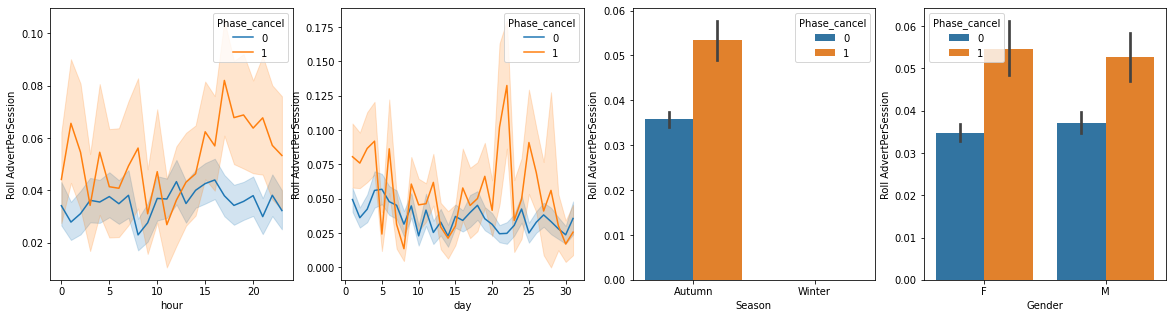

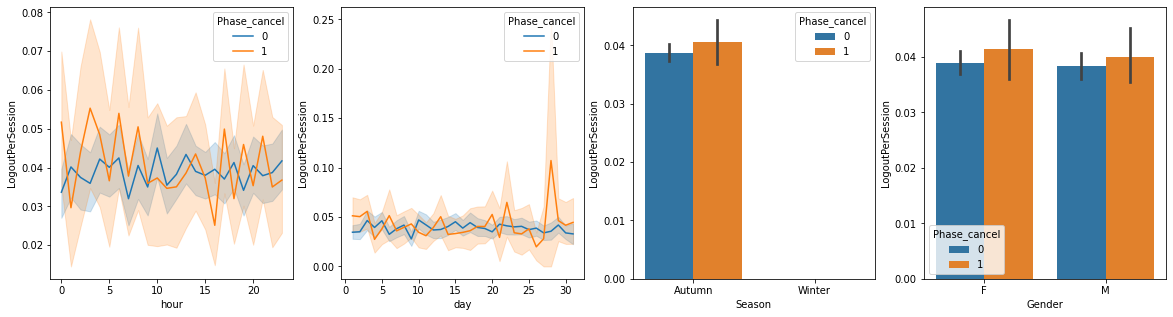

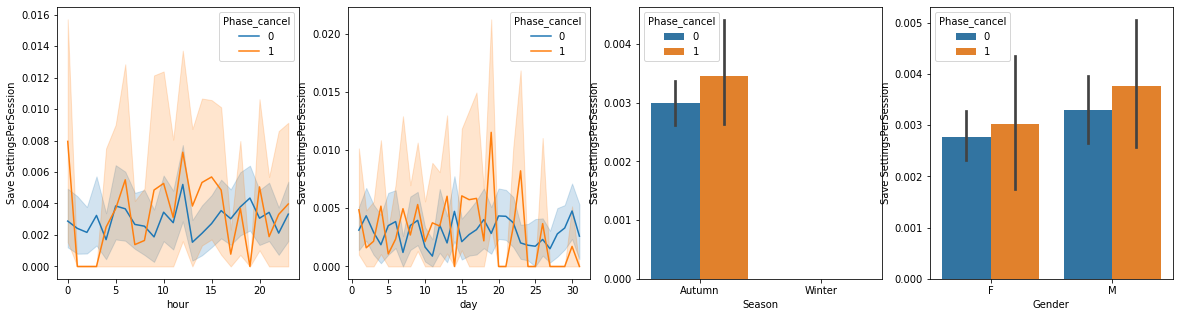

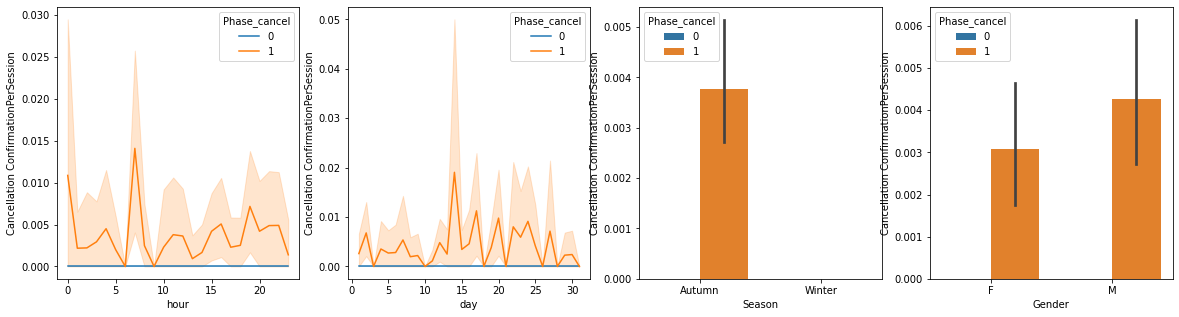

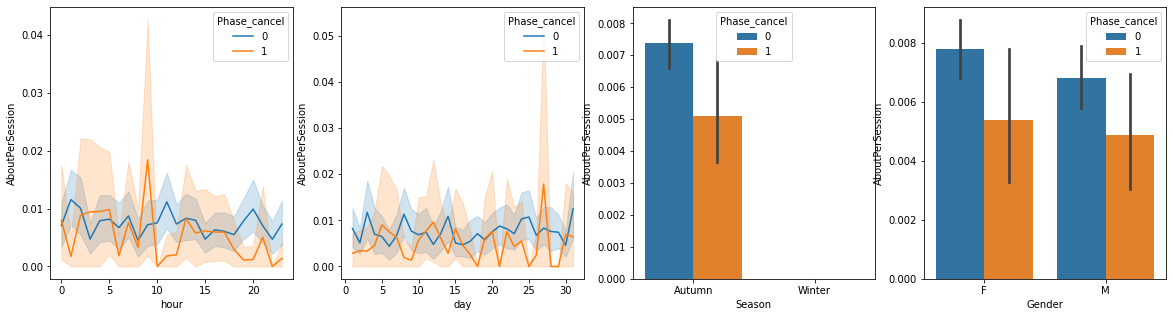

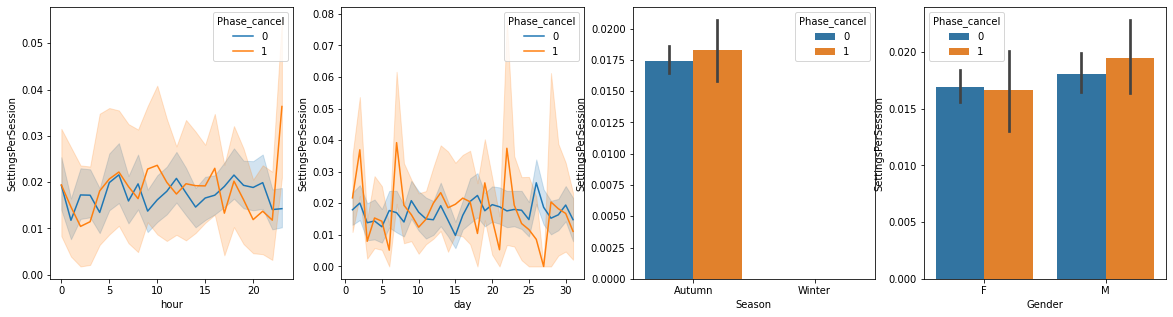

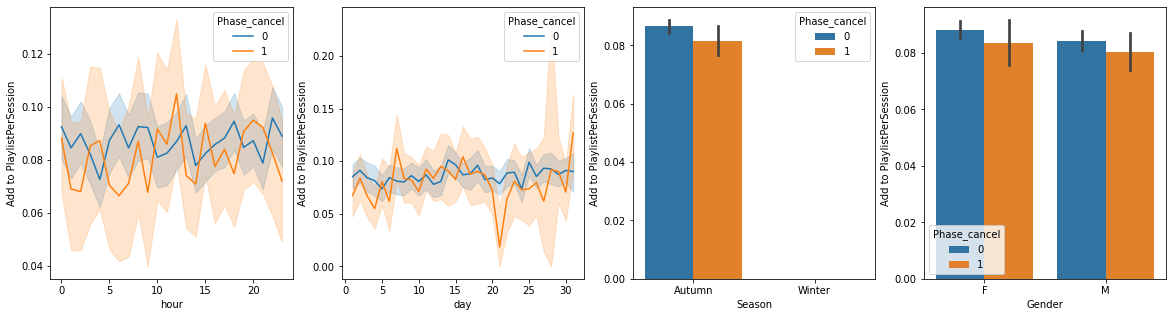

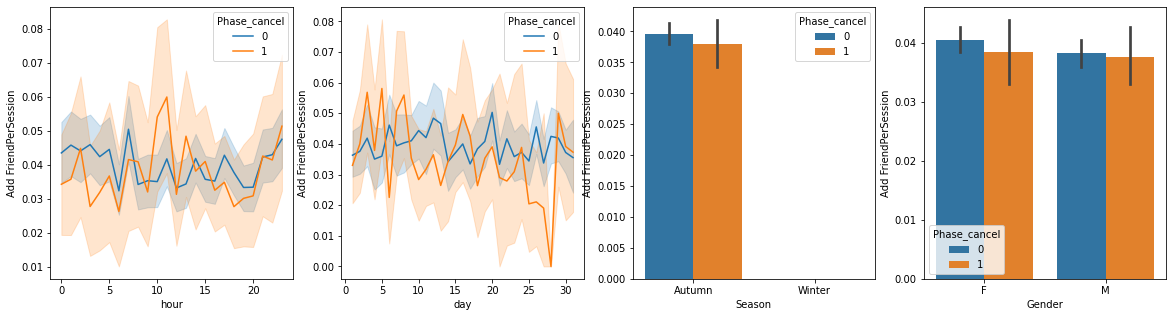

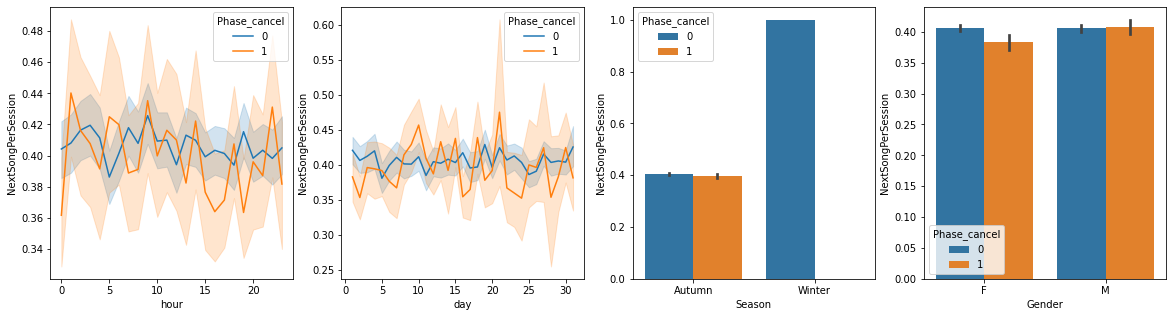

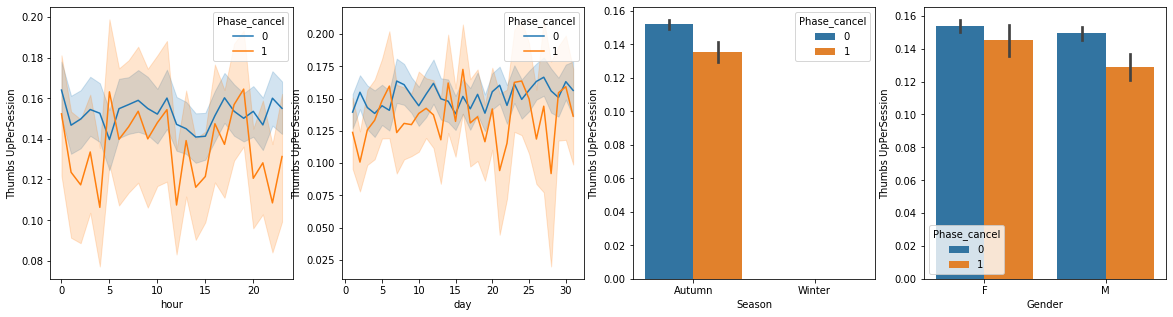

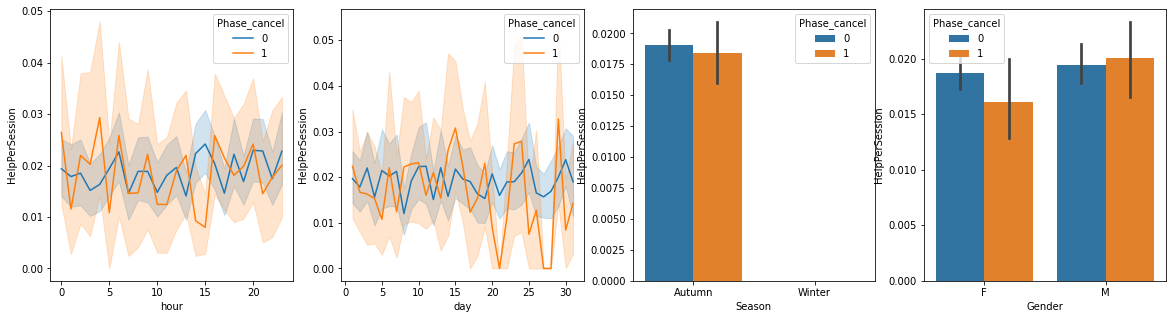

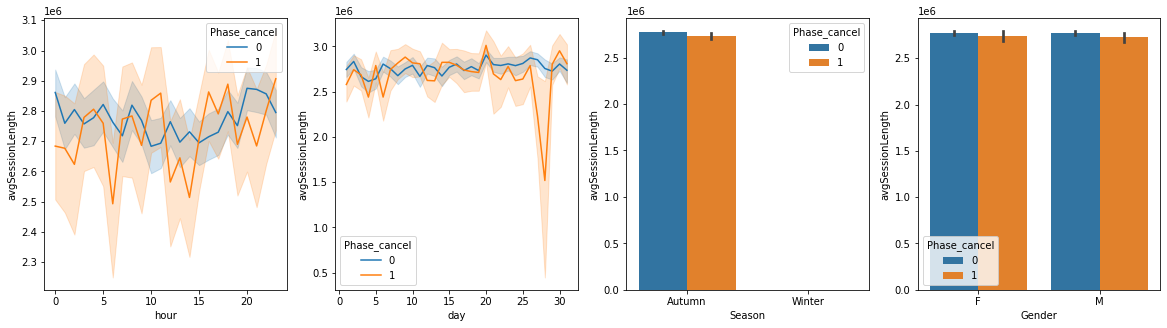

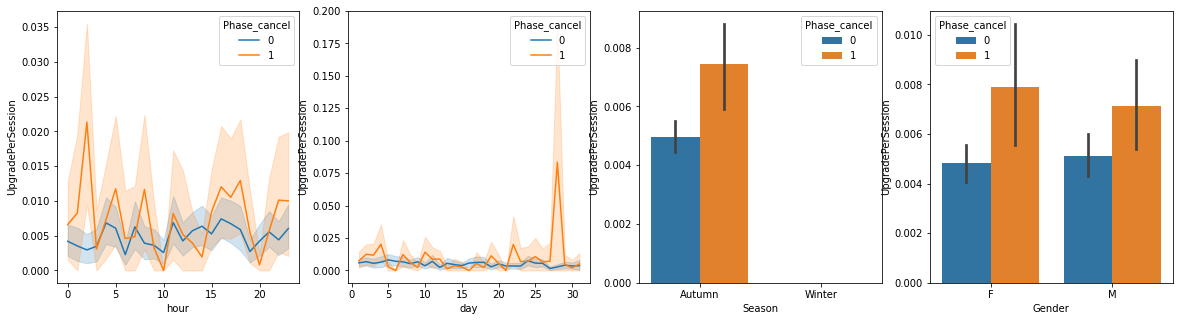

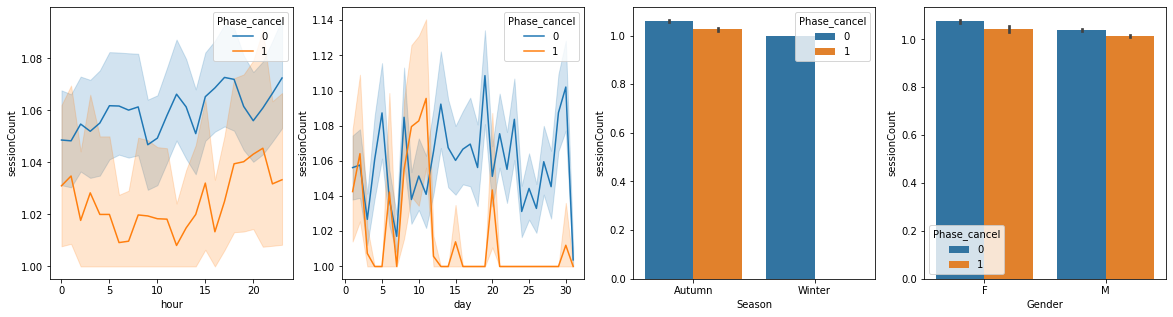

In [14]:
if plot:
    df=iLovePandas.drop(columns=['UserId', 'Submit RegistrationPerSession', 'RegisterPerSession', 'LoginPerSession'])

# #### 1D Investigation

# Check Feature Distributions
    print('------------- 1D Investigation --------------')
    print('------------- Plot & Test Feature Distributions --------------')
    
    for col, num in zip(df.describe().columns, range(1,28)):
        try:
            print(col)
            check_distribution(col)
            print('----------------------------------------')
        except Exception as e:
            print(e)

    # #### 2D Investigation
    print('------------- 2D Investigation --------------')
    print('------------- calc & plot the features relevance regarding to the label --------------')

    #calc correlation and p-value for the numerical variables
    i=0
    #plt.rcParams['figure.figsize'] = (12,16)
    plt.figure(figsize=[35, 45])
    for num_col in df.drop(columns=['Season', 'Gender', 'Location', 'Phase_cancel']).columns:
        plt.subplot(8,3,i+1)
        i+=1
        sns.histplot(data=df.drop(columns=['Season', 'Gender', 'Location']), x=num_col, hue='Phase_cancel', kde=True, common_norm=False, stat='density');#,
        calc_statistical_relevance_num(str(num_col), 0.05)
    plt.figure(figsize=[15,10])
    sns.barplot(data = df, x = 'Season', y = 'Phase_cancel');
    plt.figure(figsize=[15,10])
    sns.barplot(data = df, x = 'Gender', y = 'Phase_cancel');
    plt.figure(figsize=[10,60])
    sns.barplot(data = df, y = 'Location', x = 'Phase_cancel', color=sns.color_palette()[0]);

    # **3D-Investigations**
    print('------------- 3D Investigation --------------')

    # #### Quick summary:
    # 
    # Categorial features:
    # - Location
    # - HourOfDay
    # - Season
    # - Gender
    # - DayOfMonth
    # 
    # Numerical:
    # - TotalSessionCount per User/Location/HourOfDay/Season/Gender/DayOfMonth
    # - AVGSessionLength per ...
    # - AVGPageXInteractions per ...
    # - AVGPageYInteractions per ...
    for num_col in df.drop(columns=['Season', 'Gender', 'Location',  'Phase_cancel', 'day', 'hour']).columns:
        plt.figure(figsize=[20,5])
        plt.subplot(1, 4, 1)
        sns.lineplot(data = df, y = num_col, x = 'hour', hue = 'Phase_cancel');
        plt.subplot(1, 4, 2)
        sns.lineplot(data = df, y = num_col, x = 'day', hue = 'Phase_cancel');
        plt.subplot(1, 4, 3)
        sns.barplot(data = df, y = num_col, x = 'Season', hue = 'Phase_cancel');
        plt.subplot(1, 4, 4)
        sns.barplot(data = df, y = num_col, x = 'Gender', hue = 'Phase_cancel');

#### One-Hot-Encoding, Manual Feature Selection, Scaling

In [15]:
if show:
    user_log_valid_final.printSchema()

##### Approach: With Pipeline

#String Indexer
stages=[]
for feature in ['Gender', 'Season', 'Location']:    
    stages.append(StringIndexer().setInputCol(feature).setOutputCol((feature+'_indexer')))

#One Hot Encoder
for feature in ['Gender_indexer', 'Season_indexer', 'Location_indexer']:
    stages.append(OneHotEncoder().setInputCol(feature).setOutputCol((feature+'_hot_encoded')))

# transform categories into num_feature_vectors via pipeline

#Create pipeline and pass all stages
pipeline = Pipeline(stages=stages)
df_one_hot = pipeline.fit(user_log_valid_final).transform(user_log_valid_final)
if show:
    df_one_hot.show()

# Choose final features for assembling into a vector

#

#Vector Assembler
df_training_selection=df_one_hot.select(
 'hour',
 'day',
# 'CancelPerSession',
# 'Submit DowngradePerSession',
 'Thumbs DownPerSession',
 'HomePerSession',
 #'DowngradePerSession',
 'Roll AdvertPerSession',
# 'LogoutPerSession',
 'Save SettingsPerSession',
# 'Cancellation ConfirmationPerSession',
 'AboutPerSession',
 #'Submit RegistrationPerSession',
 'SettingsPerSession',
 #'LoginPerSession',
 #'RegisterPerSession',
 'Add to PlaylistPerSession',
 'Add FriendPerSession',
 'NextSongPerSession',
 'Thumbs UpPerSession',
 'HelpPerSession',
 'avgSessionLength',
 #'UpgradePerSession',
 'sessionCount',
 'Gender_indexer_hot_encoded',
 'Season_indexer_hot_encoded',
 'Location_indexer_hot_encoded')

#Vector Assembler
input_cols=df_training_selection.columns
assembler = VectorAssembler().setInputCols(input_cols).setOutputCol("vectorized_features")
df_vector = assembler.transform(df_one_hot)

# perform scaling before ML

#StandardScaler
scaler = StandardScaler().setInputCol('vectorized_features').setOutputCol('features')
scaler_model=scaler.fit(df_vector)
df_scaled=scaler_model.transform(df_vector)
df_scaled=df_scaled.withColumnRenamed('Phase_cancel', 'label')

### Offline Logistic-Regression-Model-Evalution including GridSearchCV - Mini Dataset

### Offline Logistic-Regression-Model-Evalution - Medium Dataset





-------------------------------- a) Logistic Regression ---------------------------------------------
-------------------------------- I am training your LR-Model ---------------------------------------------
Running "evaluate_model" --> -.- I am devastated -.- --> Converting to Pandas DataFrame .......
------- Metrics ---------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3051
           1       0.96      0.64      0.76       612

    accuracy                           0.93      3663
   macro avg       0.95      0.82      0.86      3663
weighted avg       0.94      0.93      0.93      3663

Accuracy:  0.9362738277445387
------- Confusion Matrix ---------
[[3035   16]
 [ 223  389]]
Total number of estimations: 3663
False Negative: Prediction says Churn, but it actually is not Churn 16
False Positive: Prediction says no Churn, but it actually is Churn 223
True Positive: Prediction says Churn, and it actually is Churn 389
Tru

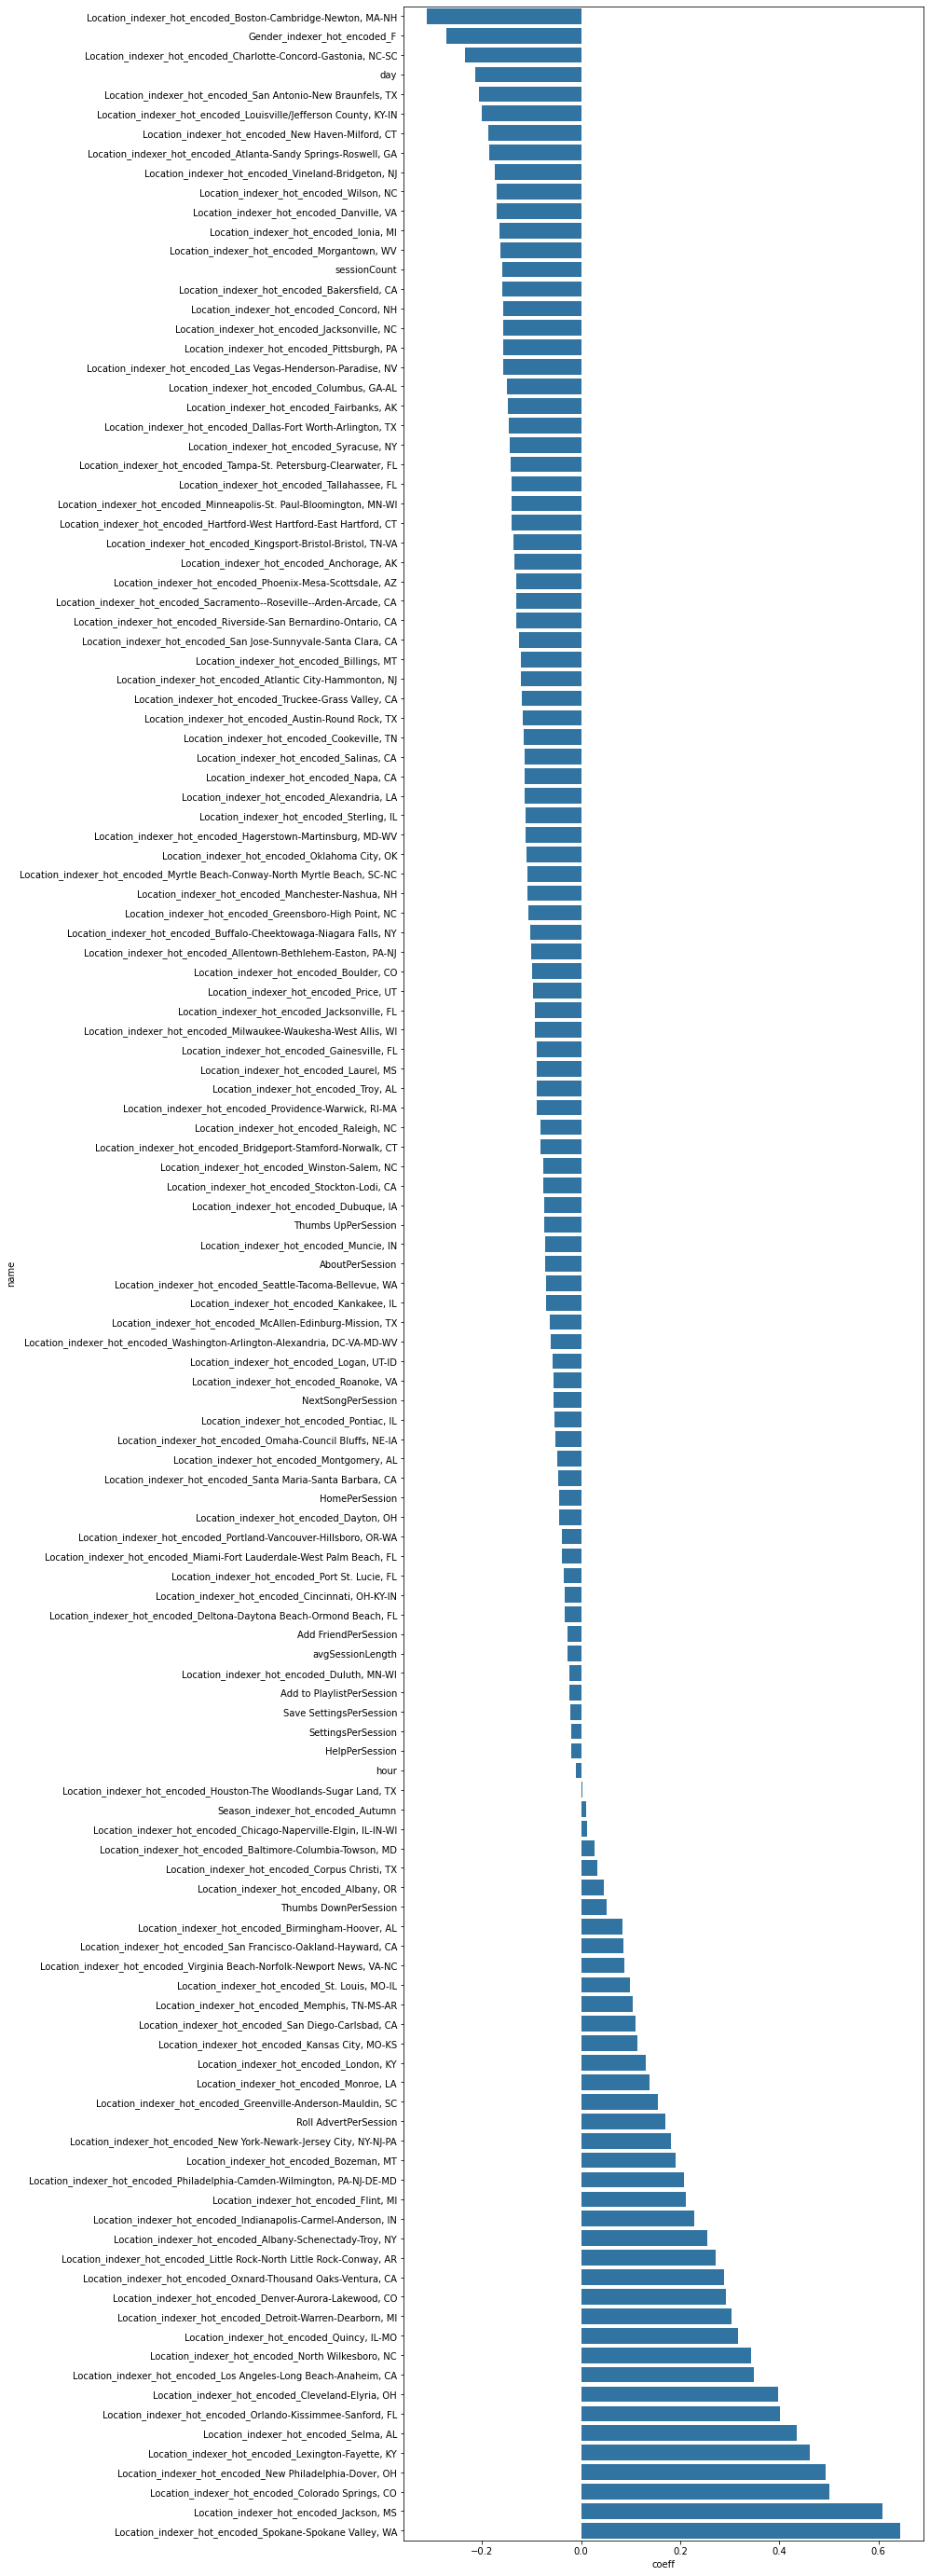

In [16]:
print('\n\n\n')
print('-------------------------------- a) Logistic Regression ---------------------------------------------')

# **a) Logistic Regression**

#Model Training
train, test = df_scaled.randomSplit([0.8, 0.2], seed=42)
print('-------------------------------- I am training your LR-Model ---------------------------------------------')
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10, elasticNetParam=0, regParam=0.01) #if no features selection is active..
#take only top ten features.
#fis = ChiSqSelector(featuresCol="features", labelCol="label", numTopFeatures = 15, outputCol = "features_subset")
#lr2 = LogisticRegression(labelCol="label", featuresCol="features_subset", maxIter=5)
#pipeline = Pipeline(stages=[fis, lr2])
lrModel = lr.fit(train)
predictions=lrModel.transform(test)

#massive performance bottleneck, takes a while (to pandas..)
if model_eval:
    evaluate_model(predictions)
    plot_feature_importance('regression')

# **LR - GridCVSecarch**

if optimize:
    if show:
        print(lr.explainParams())

    print('\n')
    print('-------------------------------- a) Logistic Regression - GridCVSecarch ---------------------------------------------')
    print('-------------------------------- I am training your LR-Model ---------------------------------------------')
    paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.5, 2.0]) #regularization parameter
                     .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) #Elastic Net Parameter
                     .addGrid(lr.maxIter, [1, 5, 10]) #Number of iterations
                     .build())
    cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
    cvModel = cv.fit(train)
    
    #Best Model Parameters
    best_model=cvModel.bestModel

    print('Best Param(regParam): ', best_model._java_obj.getRegParam())
    print('Best Param(MaxIter): ', best_model._java_obj.getMaxIter())
    print('Best Param(ElasticNetParam): ', best_model._java_obj.getElasticNetParam())

    #Model Training
    lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=best_model._java_obj.getMaxIter(), regParam=best_model._java_obj.getRegParam(), elasticNetParam=best_model._java_obj.getElasticNetParam())
    lrModel = lr.fit(train)
    predictions=lrModel.transform(test)

    if model_eval:
        plot_feature_importance('regression')
        evaluate_model(predictions)

### Offline Random-Forest-Model-Evalution-Result including - Mini Dataset

### Offline Random-Forest-Model-Evalution-Result including - Medium Dataset





-------------------------------- b) Random Forest Classifier ---------------------------------------------
-------------------------------- I am training your RF-Model ---------------------------------------------
Running "evaluate_model" --> -.- I am devastated -.- --> Converting to Pandas DataFrame .......
------- Metrics ---------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3051
           1       1.00      0.23      0.38       612

    accuracy                           0.87      3663
   macro avg       0.93      0.62      0.65      3663
weighted avg       0.89      0.87      0.84      3663

Accuracy:  0.9362738277445387
------- Confusion Matrix ---------
[[3051    0]
 [ 470  142]]
Total number of estimations: 3663
False Negative: Prediction says Churn, but it actually is not Churn 0
False Positive: Prediction says no Churn, but it actually is Churn 470
True Positive: Prediction says Churn, and it actually is Churn 142

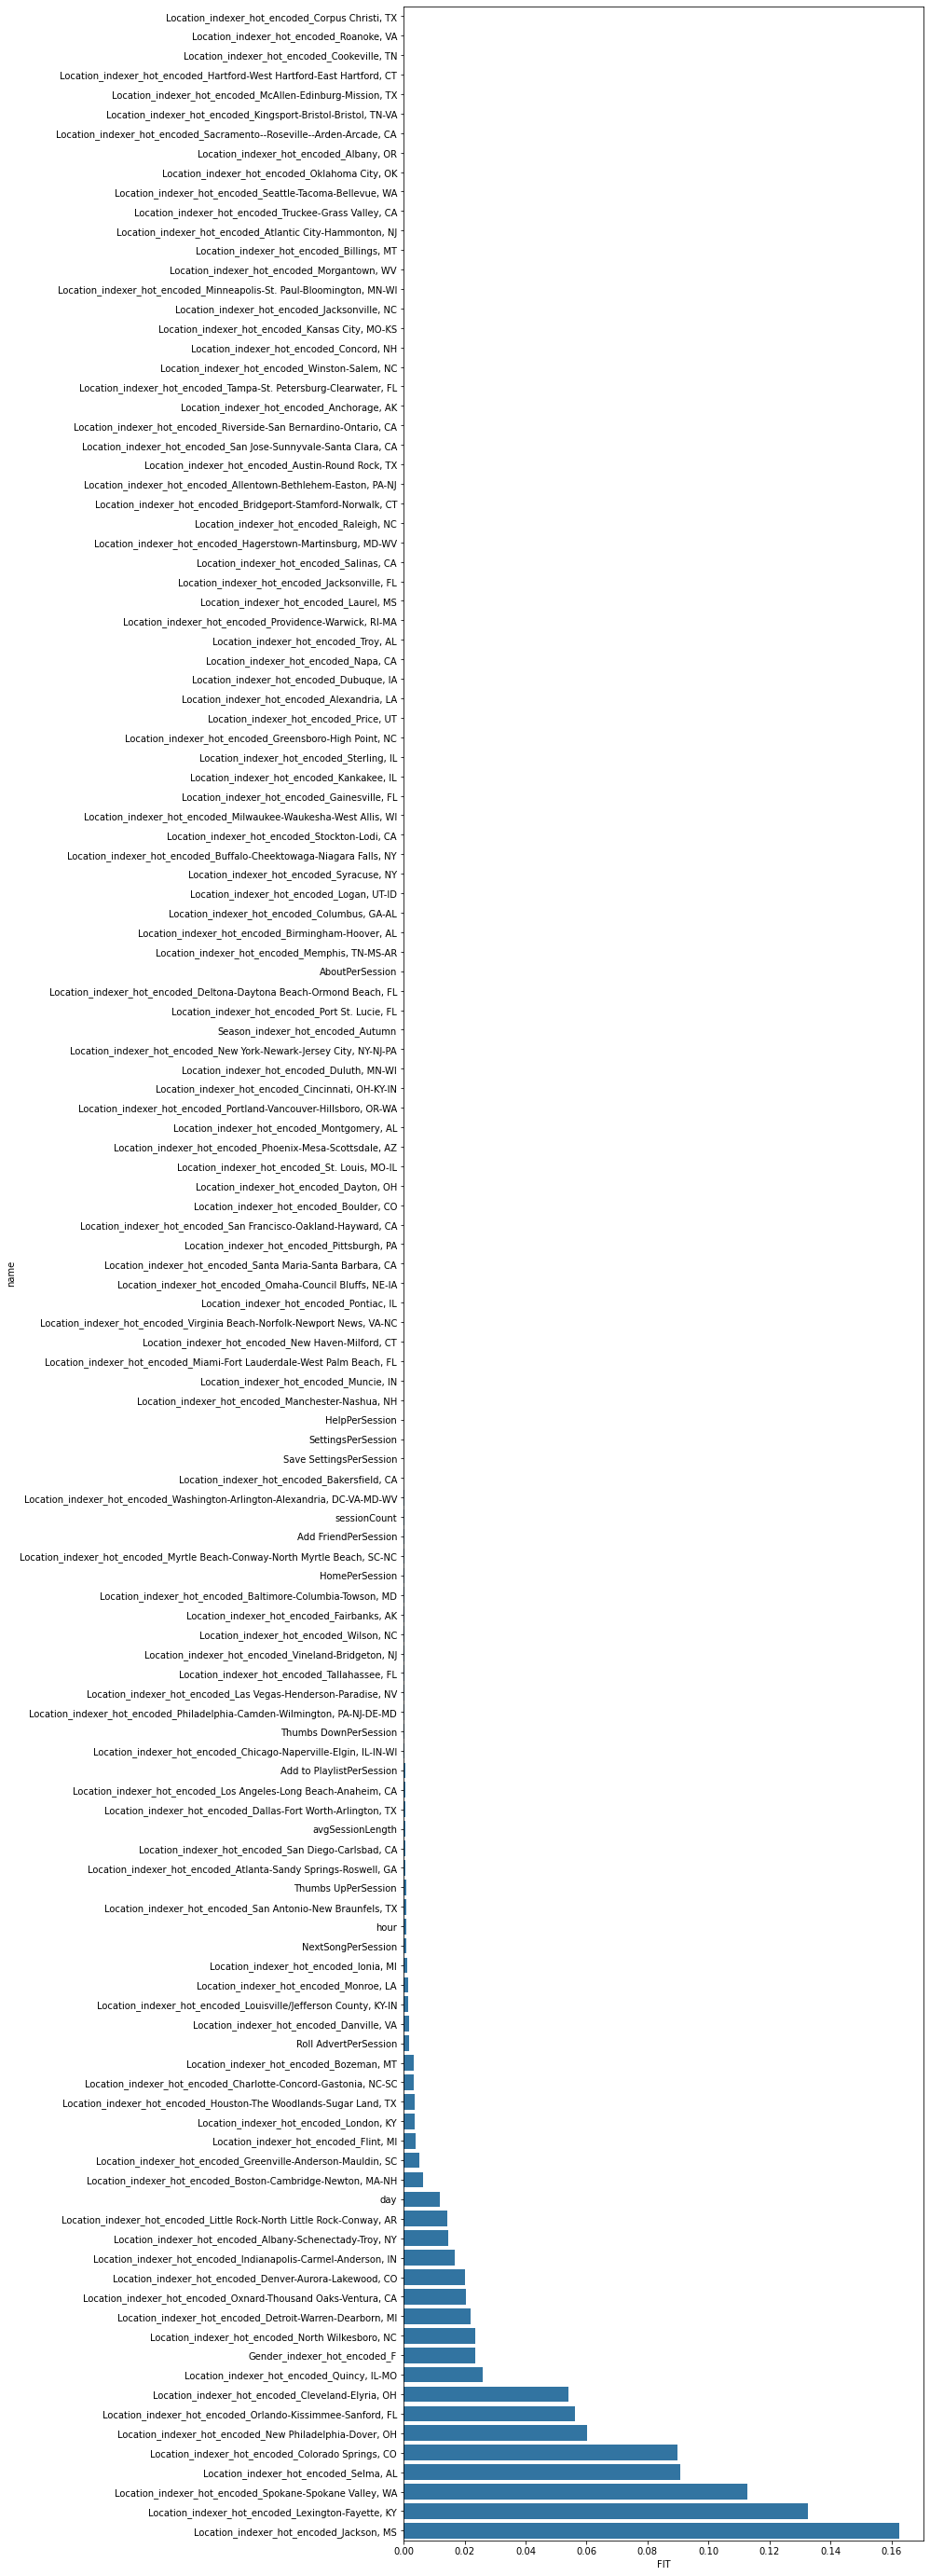

In [17]:
print('\n\n\n')
print('-------------------------------- b) Random Forest Classifier ---------------------------------------------')

# **b) Random Forest Classifier**

#Model Training
print('-------------------------------- I am training your RF-Model ---------------------------------------------')
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=40, maxDepth=7)
rfModel = rf.fit(train)
predictions=rfModel.transform(test)

if model_eval:
    plot_feature_importance('forest')
    evaluate_model(predictions)

# **RF - GridSearchCV**

#GridCVSearch
if show:
    print(rf.explainParams())

#Credits: https://medium.com/@lukazaplotnik/sparkify-churn-prediction-with-pyspark-da50652f2afc
if optimize:

    print('\n')
    print('-------------------------------- b) Random Forest Classifier - GridCVSecarch ---------------------------------------------')
    print('-------------------------------- I am training your best RF-Model using GridCVSearch ---------------------------------------------')    
    paramGrid = (ParamGridBuilder().addGrid(rf.maxDepth, [4, 5, 6, 7]) #regularization parameter
                     .addGrid(rf.numTrees, [20, 40]) #Elastic Net Parameter
                     .build())
    cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
    cvModel = cv.fit(train)

    #Best Model Parameters
    best_model=cvModel.bestModel
    print('Best Param(maxDepth): ', best_model._java_obj.getMaxDepth())
    print('Best Param(numTrees): ', best_model._java_obj.getNumTrees())

    #Model Training
    rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=best_model._java_obj.getNumTrees(), maxDepth=best_model._java_obj.getMaxDepth())
    rfModel = rf.fit(train)
    predictions=rfModel.transform(test)

    if model_eval:
        plot_feature_importance('forest')
        evaluate_model(predictions)

### Offline Gradient-Boosted-Tree-Model-Evalution including GridSearchCV - Mini Dataset





-------------------------------- c) Gradient Boosted Tree Classifier ---------------------------------------------
-------------------------------- I am training your GBT-Model ---------------------------------------------
Running "evaluate_model" --> -.- I am devastated -.- --> Converting to Pandas DataFrame .......
------- Metrics ---------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3051
           1       0.99      0.70      0.82       612

    accuracy                           0.95      3663
   macro avg       0.97      0.85      0.89      3663
weighted avg       0.95      0.95      0.94      3663

Accuracy:  0.9362738277445387
------- Confusion Matrix ---------
[[3048    3]
 [ 186  426]]
Total number of estimations: 3663
False Negative: Prediction says Churn, but it actually is not Churn 3
False Positive: Prediction says no Churn, but it actually is Churn 186
True Positive: Prediction says Churn, and it actually is 

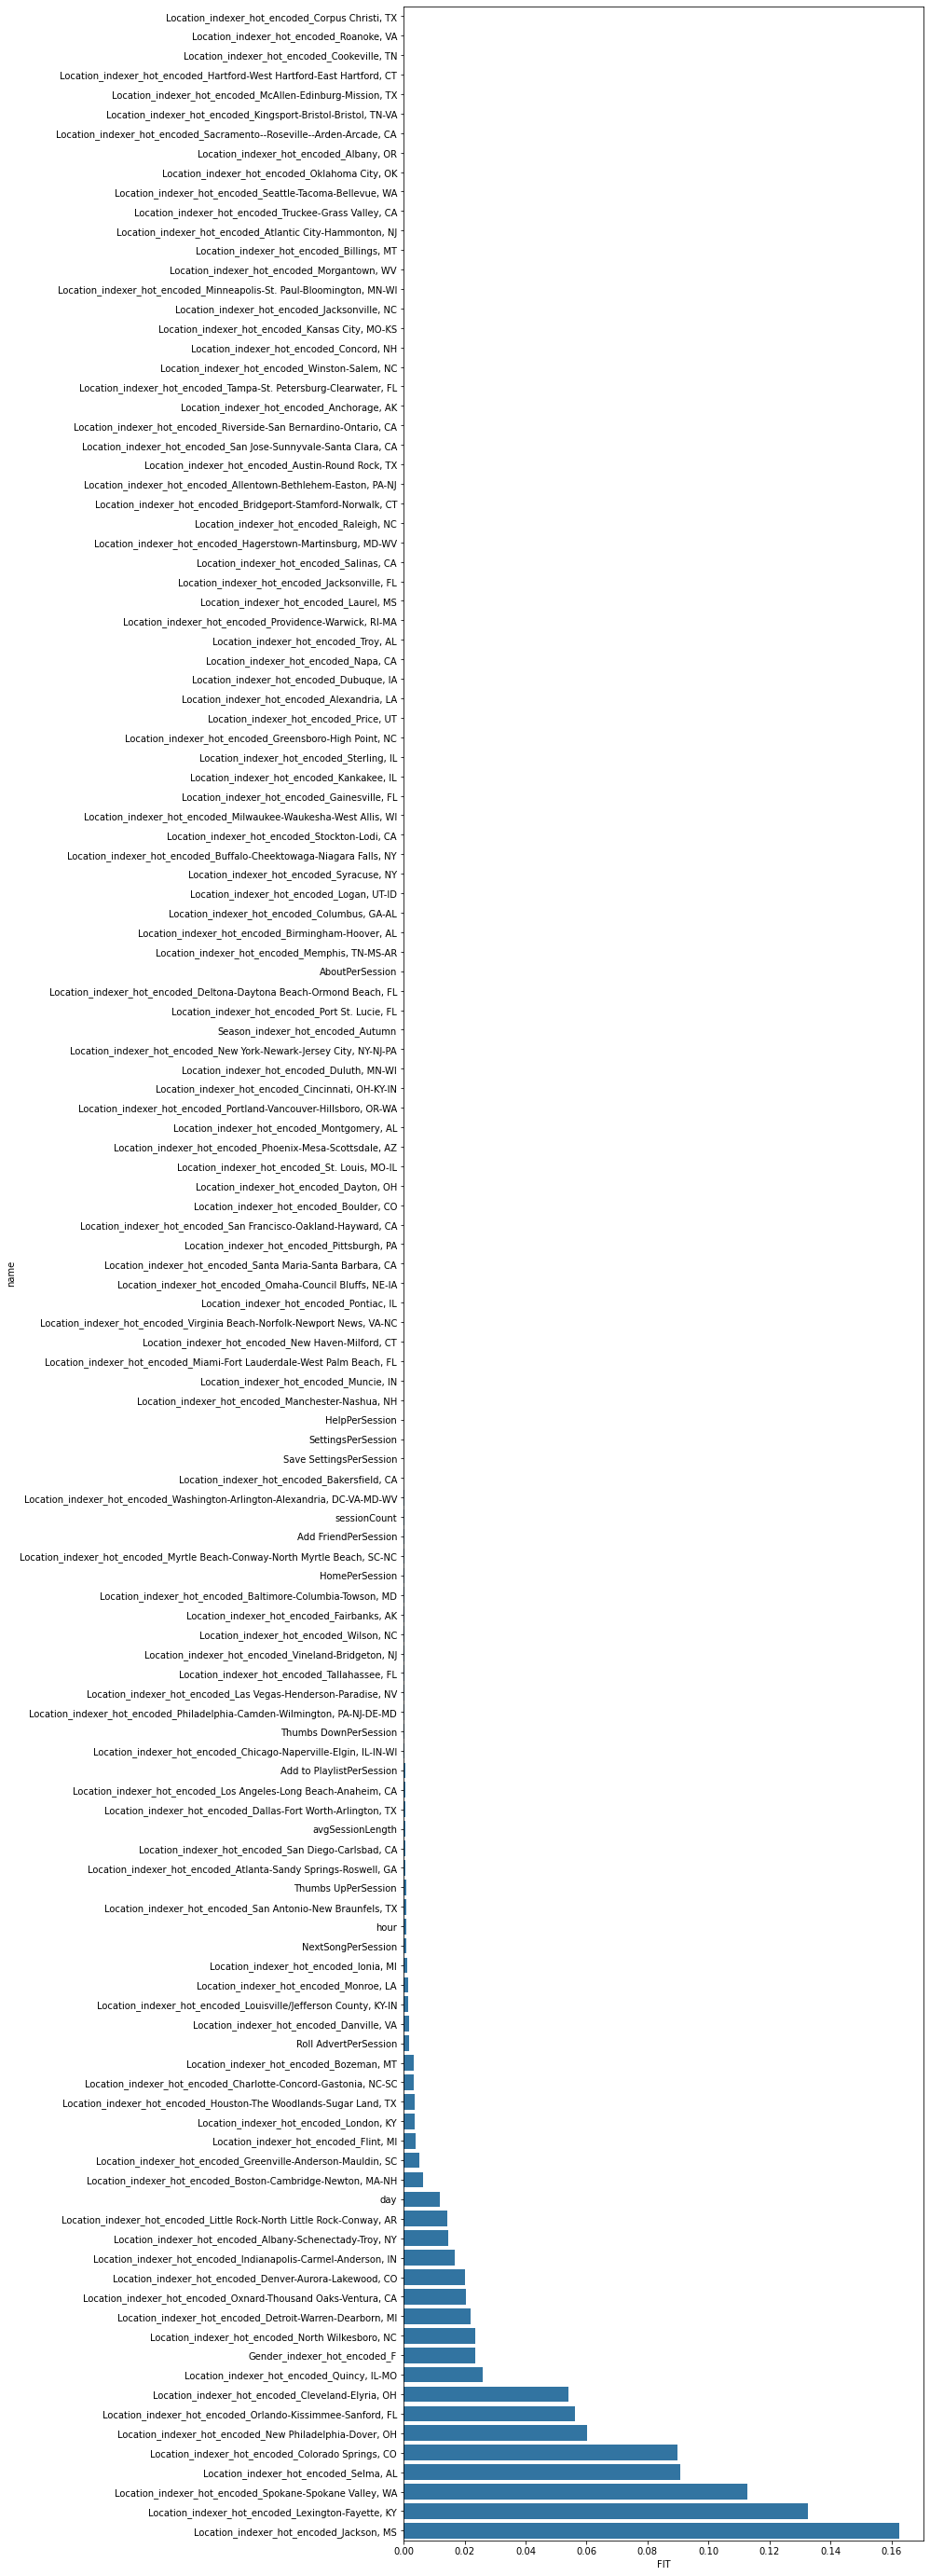

In [18]:
print('\n\n\n')
print('-------------------------------- c) Gradient Boosted Tree Classifier ---------------------------------------------')
    
# **c) Gradient Boosted Tree Classifier**

#Model Training
print('-------------------------------- I am training your GBT-Model ---------------------------------------------')    
gb = GBTClassifier(featuresCol = 'features', labelCol = 'label', maxDepth=5, maxIter=100)
gbModel = gb.fit(train)
predictions=gbModel.transform(test)

if model_eval:
    plot_feature_importance('forest')
    evaluate_model(predictions)

# **GB - GridSearchCV**

#GridCVSearch
if show:
    print(gb.explainParams())

#Credits: https://medium.com/@lukazaplotnik/sparkify-churn-prediction-with-pyspark-da50652f2afc
if optimize:

    print('\n')
    print('-------------------------------- c) Gradient Boosted Tree Classifier - GridCVSecarch ---------------------------------------------')
    print('-------------------------------- I am training your best GBT-Model using GridCVSearch ---------------------------------------------')    
    paramGrid = (ParamGridBuilder().addGrid(gb.maxDepth, [4, 5])
                     .addGrid(gb.maxIter, [20, 100])
                     .build())
    cv = CrossValidator(estimator=gb, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
    cvModel = cv.fit(train)

    #Best Model Parameters
    best_model=cvModel.bestModel
    print('Best Param(maxDepth): ', best_model._java_obj.getMaxDepth())
    print('Best Param(maxIter): ', best_model._java_obj.getMaxIter())

    #Model Training
    gb = GBTClassifier(featuresCol = 'features', labelCol = 'label', maxIter=best_model._java_obj.getMaxIter(), maxDepth=best_model._java_obj.getMaxDepth())
    gbModel = gb.fit(train)
    predictions=gbModel.transform(test)

    if model_eval:
        plot_feature_importance('forest')
        evaluate_model(predictions)  

total_workbook_time = time.process_time() - start
print(total_workbook_time)

<a id='Communicate the results'></a>
## 2.3 Communicate the results

- [x] Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.
- [x] Discussion is made as to how at least one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.

# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.